# Final Project Submission

Please fill out:
* Student name: Deztany Jackson
* Student pace: self paced 
* Scheduled project review date/time: Friday Jan 6, 2023 11AM
* Instructor name:  Morgan Jones
* Blog post URL: http://dmvinedata.com/learning-to-learn/


## Home Improvement House Predictions

### Author: Deztany Jackson

# Business Understanding

Real Estate agents in King County, Seattle are evaluating the neighborhoods to encourage current home owners of he benefits of improving and upgrading their property value. Housing data from King County was used to develop linear regressions models to support future price prediction.  

As a new data scientist I want to build up my clientele.  I am working with the real estate agents in the area to build my netowork as they increase theirs.

The primary stakeholders are real estate agents because of their wide use cases, network, domain knowledge and their incentive for home owners to increase their property value. They can also use this for getting a jump start on  marketing to potential home buyers. The same predictions could be useful for the homeowners, potential buyers and even those in the remodeling and construction business. Because of their connection and  real estate agents are able to influence a larger community's property value which as greater impact than convinving individual homeowners. 
The area attracts new implants from tech jobs. A great number of these people (as singles or families) may be looking to buy or rent.

This model is used as an intial model supporting course predictions.
The main attributes used to support model prediciton are: Condition and Grade.<br>
The main attributes used to support model creation are: 
- 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
- 'waterfront', 'yr_built', 'zipcode', 'cond_num', 'grade_num'
I would not guarantee the price predicions are 100% accurate, but will be useful to support general predictions.  
The model used accounts for 67% variability. This means there are things that the model still doesn account for 
in making predictions. 

 [Phase 1 Project Description](https://learning.flatironschool.com/courses/4964/pages/phase-2-project-description), 2022

# Data Understanding

This project uses the King County House Sales dataset (from GitHub project repo). This can be found in several locations: [Git Hub Data](https://github.com/learn-co-curriculum/dsc-phase-2-project-v2-3/tree/main/data) & [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction). 

The data is in the format of "csv". The initial data used in the modeling will start with 20 of possible attributes. As modeling progressing certain attributes (features) will be processed, transformed and possibly removed.


In [1]:
#Imports necessary intial libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Allowing for tables to have longer scroll capability
pd.set_option('display.max_rows', 500)

The imported data is the entire initial dataset. This will be scoped down before the intial understanding to support the the core modeling needs with the limited time available. Starting with the entire dataset could potentially support a more accurate model with the increase of the attributes to choose from. We will settle for good enough with the dataset we have.


In [2]:
#Import of data to explore, make the id the index column
#The full entire dataset.
df = pd.read_csv('data/kc_house_data.csv', index_col=0)
#displaying the intial top five
df.head() 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Describes the columns(features) and types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

---

The start of the intial dataset used for the modeling. Certain features will be removed before the data understanding and analysis begins. This is an initial scoping to simplifying modeling only, no statstical or other reason. 

In [4]:
#Ignore these column at a minimum level 
#Ignore data, view, sqft_above, sqft_basement, yr_renovated,lat ,long ,sqft_living15, sqft_lot15

# The new dataset without the extra attributes. Use copy to keep old dataset intact.
kc_df = df.copy()

#Columns to drop
drop_col = ["date","view", "sqft_above", "sqft_basement", "yr_renovated","lat" ,"long" ,"sqft_living15", "sqft_lot15"]
kc_df = kc_df.drop(drop_col, axis = 1)
kc_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
id,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955,98178
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125
5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074


Looking at the dataset to see the size, any null values and the data types of the original dataset we will work with

In [5]:
#Viewing information about new dataset. Keep an eye on features with null values.
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.0+ MB


Using shape to check size of dataset, rows and columns.  Column names and amount are a key to track of through data preparation.

In [6]:
#Check size of the data set
kc_df.shape

(21597, 11)

The following features are all numerical and categorical. The describe function only gives out for numerical numbers, not categorical (objects). The features of "yr_built", "bathroom", "bedroom" and "zipcode" are numbers and used to classify and count values.  The rest are numerical cardinal values. The names of the features are generally self explanatory and will stay the same.

The features (not pictured below) of "condition" and "grade" picture are categorical strings, but will potential change to numerical values for ease of use.

Ref: [Numerical Numbers, Rod Pierce](https://www.mathsisfun.com/numbers/cardinal-ordinal-nominal.html)

In [7]:
# Numerical descriptions and statistics
kc_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,98199.000000


### Initial Features Used
- **King County Table**
    - Rows: 21597 
    - Features: 11
    * "id" is not a feature used in the modeling
    
##### Cardinal Numbers

- ***price - (Target Variable)***
    - Description: Price is the amount of the house in context of the current attributes. 
    - Type: Float Number
    - Expectation/Comment: Price will be out target variable.  We will want to see after developing a solid model the varying of attributes would effect price. The price difference after an "upgrading" the home is also needed.
- **bedrooms**
    - Description: Number of bedrooms for the given home 
    - Type: Int Number
    - Expectation/Comment:Will evaluate how well this impacts the model. 
- **bathrooms**
    - Description: Number of bathrooms for the given home
    - Type: Int Number
    - Expectation/Comment: It has the second highest correlation value against price. These are.25, .5 and .75 are use in addition to whole numbers. .25-Sink; .5-Sink and Toilet; .75-Sink, Toilet and Shower,/Bath; 1 - Everything  
- **sqft_living**
    - Description: The size of the livable space in the house
    - Type: Int Number
    - Expectation/Comment:We will assume larger will amount gather more money.
- **sqft_lot**
    - Description: The size of the lot
    - Type: Int Number
    - Expectation/Comment: We will assume larger will gather more money.
- **floors**
    - Description:'he Number of Floors.  
    - Type:float Number
    - Expectation/Comment: We are not using the other attributes that compliment the number of floors.Sometimes one floor could be desirable.  It would be hard to understand the house is architected with floors.  It could be one floor and a basement, or two floors and no basement. 
    
##### Nominal Numbers

- **yr_built**
    - Description: Year when house was built
    - Type: Int Number
    - Expectation/Comment: It could give context to  the grade and condition. This may be useful for changing variables for prediction purposes

- **zipcode**
    - Description: ZIP Code used by the United States Postal Service
    - Type: Int Number
    - Expectation/Comment: The Zipcode will be there to help add to the business case. It can be helpful in creating collection of houses to focus on. 
    
##### Categorical Objects
- **waterfront**
    - Description: Whether the house is on a waterfront
    - Type: Object String
    - Expectation/Comment: There isn't any information on what type of water. For those that are Null, we will fill Null with Unknown
- **condition**
    - Description: How good the overall condition of the house is. Related to maintenance of house.
    - Type: Intial Object String (Transformed to Int) - 5 Values
    - Expectation/Comment: This paired with the grade may the the top useful in changing for prediction. Will be transformed into number from string later in model.
- **grade**
    - Description: Overall grade of the house. Related to the construction and design of the house.
    - Type: Intial Object String (Transformed to Float) - 13 Vaues
    - Expectation/Comment: This paired with the condition may the the top useful in changing for prediction. Will be transformed into number from string later in model.

Viewing and counting the values of the categorical features.  We can assess what the best route to work with these is. Do we change to ordinal numbers or process this in the future using techniques like One Hot Encoding? For the "condition" and "grade" mapping numbers to the values will be used.

---

A broad view of the distribution of the features help understand the possible transformation needs of the data. Looking to see if the data is linear and/or normal distributed. The sqft_living looks the most linear against price. Most of the data is skewed and not normally distributed. Log-transformation and normalization should help the continous data during the modeling.

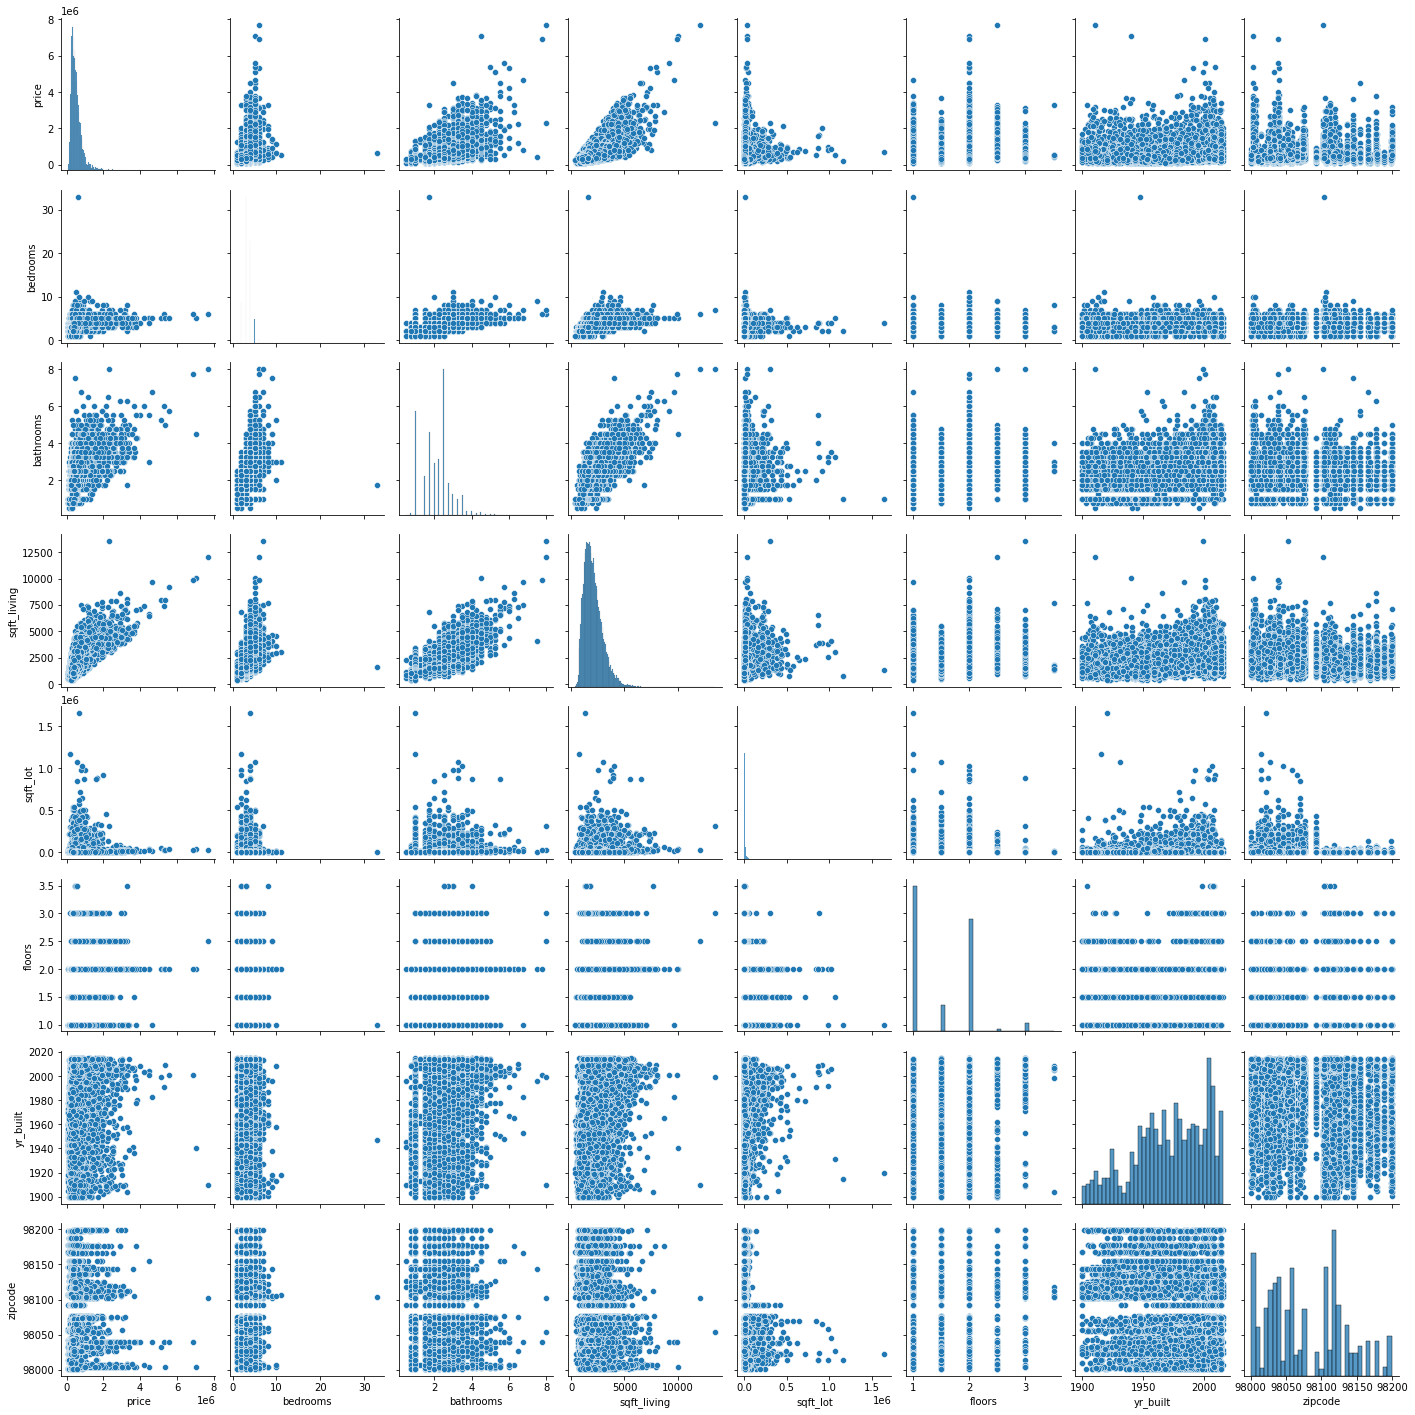

In [8]:
#Pair plot for quick view of the datasets distribution and linearity
sns.pairplot(kc_df)


# Data Preparation

Data preparation happens throughout the modeling process in iteration as new information is known.
There will be some preparation (e.g.data transformation and scaling) that will happen as we split the training and test
data from one another.  This is to protect against data leakage.

Looking further into the categorical data, to assess future processing needs.

In [9]:
#Viewing the values and their count for a feature
kc_df[["condition"]].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
dtype: int64

Using the "Column Names" file description and [King County Clossary, Building Conditions](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) the string and values mapping was found and used. Even though OHE can be performed on the string values in the future. Having numbers makes it easier for data processing and manipulation (on new data or modified test data) for predicitons.

In [10]:
#Creating a dictionary to map to the string values for condition
cond_num = {'Very Good':5, "Good": 4,'Average': 3, "Fair": 2, "Poor": 1}


In [11]:
#Applying the dictionary to map to the values of the original values
# New column is added
kc_df["cond_num"] = kc_df["condition"].map(cond_num)


In [12]:
#Checking the information on the new column
kc_df[["cond_num"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   cond_num  21597 non-null  int64
dtypes: int64(1)
memory usage: 337.5 KB


In [13]:
#Checking to see if the value counts of the original and the new column match
kc_df[["cond_num","condition"]].value_counts()

cond_num  condition
3         Average      14020
4         Good          5677
5         Very Good     1701
2         Fair           170
1         Poor            29
dtype: int64

The original and new column for "condition" have a matching number of values The same process that was done to the "condition" attribute is done to the grade attribute below.


In [14]:
#Viewing the values and their count for a feature
kc_df[["grade"]].value_counts()

grade        
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
dtype: int64

In [15]:
#Creating a dictionary to map to the string values for grade
grade_num = {'13 Mansion':13, "12 Luxury": 12,'11 Excellent': 11,
             "10 Very Good": 10,"9 Better": 9,"8 Good": 8,
             "7 Average": 7,"6 Low Average": 6, "5 Fair": 5,
             "4 Low": 4, "3 Poor": 3}

In [16]:
#Applying the dictionary to map to the values of the original values
# New column is added
kc_df["grade_num"] = kc_df["grade"].map(grade_num)

In [17]:
#Checking to see if the value counts of the original and the new column
kc_df[["grade_num","grade"]].value_counts()

grade_num  grade        
7          7 Average        8974
8          8 Good           6065
9          9 Better         2615
6          6 Low Average    2038
10         10 Very Good     1134
11         11 Excellent      399
5          5 Fair            242
12         12 Luxury          89
4          4 Low              27
13         13 Mansion         13
3          3 Poor              1
dtype: int64

Dropping the original columns of condition and grade.  This is essentially duplicate information as the cond_num and grade_num.


In [18]:
#drop the original condition and grade columns
kc_df = kc_df.drop(["condition","grade"], axis = 1)
kc_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,cond_num,grade_num
id,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,1955,98178,3,7
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,1951,98125,3,7
5631500400,180000.0,2,1.00,770,10000,1.0,NO,1933,98028,3,6
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,1965,98136,5,7
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,1987,98074,3,8


---

The "waterfront" feature is the only feature that has "NaN". These values will be imputed with a value of "Unknown" than deleted or imputed with "No". The Null values make up over ~10% of the data set. This could impact training of the model adversly because the limited data. Less than 1% of the known homes have a waterfront view
"No" may seem like a conservative choice to inpute, but using "Unknown" allows future data exploration if more information becomes available.

In [19]:
#Checking for waterfront Null counts
kc_df[["waterfront"]].isna().value_counts()

waterfront
False         19221
True           2376
dtype: int64

In [20]:
#Checking waterfront current value counts
kc_df[["waterfront"]].value_counts()

waterfront
NO            19075
YES             146
dtype: int64

If waterfront becomes a main feature it is good to understand which home types the Null is associated with.
It seems the "average"  and "good" grade home are traced to much of the Null values.  If they have space for home repair, having a more accurate
value of "waterfront" could turn out helpful for real estate agents to market.

In [21]:
#Checking to see which house types these Null values affect
kc_df[kc_df["waterfront"].isna()]["grade_num"].value_counts()

7     1000
8      656
9      295
6      228
10     116
11      42
5       30
12       7
4        2
Name: grade_num, dtype: int64

Usually it is better to fill in "NaN" after train and test split to prevent data leakage.  
Because filling in unknown as no effect on the other features, decided to do it before.

In [22]:
#Replaces "NaN" with "Unk"
kc_df["waterfront"].fillna("Unk", inplace = True)

#Check NaN Count after replacing "NaN"with "Unk"
print("Values: ",kc_df[["waterfront"]].value_counts())

print("Waterfront Null Values:", kc_df[["waterfront"]].isna().sum())

Values:  waterfront
NO            19075
Unk            2376
YES             146
dtype: int64
Waterfront Null Values: waterfront    0
dtype: int64


Remove duplicate values from the dataset. This could be from clerical issues multiple data entries.

In [23]:
#Remove the duplicate rows from data set
kc_df = kc_df.drop_duplicates()
print (kc_df.duplicated().sum(),kc_df.value_counts().sum())

0 21590


### Training and Testing  & Cross Validation Approach

Predicting new home prices comes after training and testing the model. We will split our data set into 80% training set and 20% testing. The train/test split is used for intial model validation. Kfold cross validation will also be used.  This allows the dataset to be split into "train" and "test" and then when the training data is used with cross validation it will be split into "training" and "validation" data. 

The target value is the "price" value.  This will be set to "y" and the rest of the data will be in "X". This is then used to do the initial train/test split.

We do not want the test data to be trained with the training data. This is data leakage and can distort the training process.

In [24]:
# Importing library to split the data into training and test data for model validation. 
from sklearn.model_selection import train_test_split

#dropping the target variable from the dataset features
X = kc_df.drop("price", axis=1)
# Setting the target variable
y = kc_df["price"]

#Setting the test size .
test_size = .2

#Using the basic train/test split. Adding a random state to product the random set each time.
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= test_size, random_state=42)

In [25]:
#Looking at the split's shape
print(X_train.shape , X_test.shape, y_train.shape, y_test.shape)

(17272, 10) (4318, 10) (17272,) (4318,)


Visualization of target variable: 
[Ref: Linear Reg Lab, #20](https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution) 
Most of the housing prices are less than 1 million dollars.

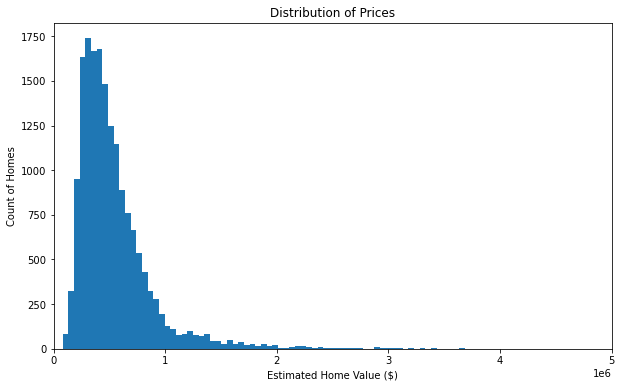

In [26]:
#Setting the frame and figsize
fig, ax = plt.subplots(figsize=(10, 6),facecolor = "white")


#Plotting the training portion of the target variables
ax.hist(y_train, bins=150)

#Setting labels and titles
ax.set_xlabel("Estimated Home Value ($)")
ax.set_ylabel("Count of Homes")
ax.set_title("Distribution of Prices")

#Setting limit on the x axis
plt.xlim([0, 5000000])

plt.savefig("images/Initial_DistPrices_1.png", dpi=99)

The target variable in the training data set is positively skewed. A log transformation may support this model effort and normalize the target variables.

In [27]:
#Looking at the distribution of the price
y_train.describe()

count    1.727200e+04
mean     5.415971e+05
std      3.646503e+05
min      8.000000e+04
25%      3.230000e+05
50%      4.520000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [28]:
#Reviewing the y test "price" stats
y_test.describe()

count    4.318000e+03
mean     5.351554e+05
std      3.782946e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.450000e+05
75%      6.394875e+05
max      7.060000e+06
Name: price, dtype: float64

Reviewing the statistics on the y_train and y_test value for current understanding and future comparison

---

# Baseline Modeling (1)


###  Initial Correlation

The initial linear regression model will be done with the highest correlated feature. This will be considered our
baseline model.  From here we will do several iterations to see if we can improve the model's performance with different techniques.

Check for the highest correlated values to the target variable "price". 
Correlation works on numerical values, not categorical ones.


In [29]:
#Print out correlation values in dataframe
#This is done with the "price" value in the dataset.
corr = kc_df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode,cond_num,grade_num
price,1.000000,0.308835,0.525933,0.701938,0.089868,0.256948,0.054015,-0.053381,0.036039,0.668077
bedrooms,0.308835,1.000000,0.514567,0.578211,0.032448,0.178196,0.155831,-0.154143,0.026450,0.356788
bathrooms,0.525933,0.514567,1.000000,0.755813,0.088396,0.502788,0.507247,-0.204782,-0.126446,0.665881
sqft_living,0.701938,0.578211,0.755813,1.000000,0.173423,0.354350,0.318431,-0.199751,-0.059526,0.763031
sqft_lot,0.089868,0.032448,0.088396,0.173423,1.000000,-0.004664,0.053100,-0.129583,-0.008894,0.114826
floors,0.256948,0.178196,0.502788,0.354350,-0.004664,1.000000,0.488904,-0.059711,-0.263915,0.458705
yr_built,0.054015,0.155831,0.507247,0.318431,0.053100,0.488904,1.000000,-0.347430,-0.361447,0.447723
zipcode,-0.053381,-0.154143,-0.204782,-0.199751,-0.129583,-0.059711,-0.347430,1.000000,0.002910,-0.185850
cond_num,0.036039,0.026450,-0.126446,-0.059526,-0.008894,-0.263915,-0.361447,0.002910,1.000000,-0.146765
grade_num,0.668077,0.356788,0.665881,0.763031,0.114826,0.458705,0.447723,-0.185850,-0.146765,1.000000


The most correlated is the sqft_living with (.7), the least is the zipcode with (-.05). Below this correlation table will be visualized in a heatmap.

Heatmap: [Ref: Phase 2, #20 Linear Reg Lab](https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution) 

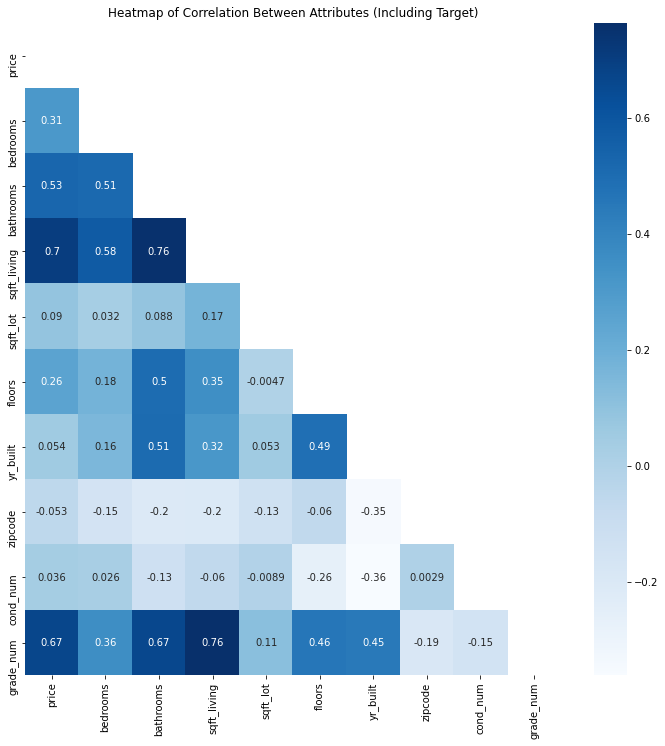

In [30]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(12,12),facecolor = "white")

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    #Color of the heatmap
    cmap="Blues",
    # Specifies that we want labels, not just colors
    annot=True,
    
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

plt.savefig("images/Int_Corr_2.png", dpi=99)

The "sqft_living" feature has the highest correlation of .7 with the "price". The "grad_num" feature is the second highest correlated with the "price". This is good to know because this will be one of the attributes changed during predictions.  The zipcode" feature has a negative correlation value. "Bathrooms" and "sqft_living are highly correlated as well. These correlations are the only ones above .7. This dataset doesn't have a really high correlation with the "price" feature or with each other.


---

Below we will plot the most correlated feature against price.  This will let us see if this distribution is linear for our baseline model.

In [31]:
#Strongest numerical feature from the heatmap
most_correlated_feature = "sqft_living"

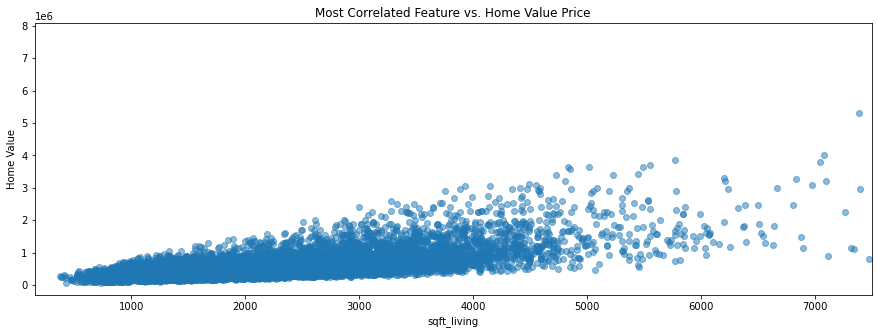

In [32]:
#Plot a scatter plot "Most Correlated Feature vs. Home Value"
fig, ax = plt.subplots(figsize = (15,5),facecolor = "white")

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("Home Value")
ax.set_title("Most Correlated Feature vs. Home Value Price");
plt.xlim([150, 7500])
plt.savefig("images/Linear_Price_3.png", dpi=99)

The graph shows a fairly linear data plot. The larger the sqft gets with the increase of price
the more outliers arise.

### Baseline Model - Basic Train/Test Split 

Modeling the baseline feature using the basic train/test split first then a kfold validation method.


Modeling using linear regression approach. This looks at the relationship between dependent (y) and independent (x) values.
- The "fit" method learns something about the data.
- The "transform" method uses what it learned to transform the data.

The train and test data are separated but, the same process needs to be applied on each. 
* During processing, fitting the data is done on the training data to learn. It is  applied on the testing data using transform.

In [33]:
#Reshaping from a 1D series to a multidimensional array that the transformers support

#Reshape training data to support modeling without error
X_train[most_correlated_feature]
X_array = np.array(X_train[most_correlated_feature])
newarr = X_array.reshape(-1,1)

#Reshape the test data to support modeling without error for single arrays
X_test[most_correlated_feature]
X_array_test = np.array(X_test[most_correlated_feature])
newarr_test = X_array_test.reshape(-1,1)

In [34]:
#Showing the data prior and post reshaping
print(X_train[most_correlated_feature].shape,newarr.shape)

(17272,) (17272, 1)


In [35]:
#Importing Linear Regression library
from sklearn.linear_model import LinearRegression

#Initializing model
linreg = LinearRegression()
#Fitting training data
linreg.fit(newarr, y_train)
linreg.fit(newarr_test, y_test)
LinearRegression()

LinearRegression()

After we train the model. The train and test data is applied (.predict) to the trained linear regression model to predict the estimated y value ("price"). From here a R2 score and RMSE are calculated.  The R2 allows us to see how well the test and train model are compared to each other and how much of the variation the model covers. The higher the R2 score the better. We would like the test R2 score to be higher than the trained model. 

RMSE is used to measure distance between predicted and actual values. It measures how well the model predicts. The lower value  the better (closer to zero is best). Usually the training data is higher than the test data, a lower test value supports the accuracy of the model. 

- [RMSE Kaggle, 2020 ](https://www.kaggle.com/general/215997)
- [David Dalpiaz, 2020](https://daviddalpiaz.github.io/r4sl/regression-for-statistical-learning.html)

In [36]:
#Importing library to look at errors
from sklearn.metrics import mean_squared_error

#Y price Predictions for training and testing features
y_hat_train = linreg.predict(newarr)
y_hat_test = linreg.predict(newarr_test)

#Root Mean Square Error (np.sqrt of the MSE)
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

#r2 Score
Model_train_score = linreg.score(newarr,y_train)
Model_score = linreg.score(newarr_test,y_test)

print("Baseline Train/Test:")
print('Train RMSE ', train_rmse)
print('Test RMSE: ', test_rmse)
print()
print('Train Model Score: ', Model_train_score)
print('Test Model Score: ', Model_score)


Baseline Train/Test:
Train RMSE  260172.0361161922
Test RMSE:  268864.35998011974

Train Model Score:  0.49091149233831743
Test Model Score:  0.494749423259338


The test RMSE is currently high and worse than the training Error. They both are far from 0. The model will not generalize well for future test data.
The reason is unclear,it may be irreducible noise. Will look into applying log transforming to certain continous attributes in the dataset to see. 
The base model R2 scores are both round only .49, the test R2 is higher than the trained data. This base model isn't strong enough to support predicting prices. This tells us how we the model is at predicting the variance in dataset.  There may be better features or a combination of a few that hopefully will increase the score.

### Baseline Model- Kfold Validation

The original dataset is split into "train" and "test".   We are applying the kfold validation to our training set which splits the training dataset into "train and "validation". The amount of splits is set in the cv. The Kfold score will be a mean of the various splits.


In [37]:
#Importing cross validate and shuffle split.
#Shuffle split creates different values for splits and test size
from sklearn.model_selection import cross_validate, ShuffleSplit

#Splitting the dataset twith a .3 test size
splitter = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

#Initalize as used estimator
baseline_model = LinearRegression(normalize= True)

#Baseline scores using kfold cross validation
#Most correlated feature - sqft_living
baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)


#Mean of the train and validation scores
print("Baseline Models:")
print("Current Kfold Train mean score:     ", baseline_scores["train_score"].mean())
print("Current Kfold Validation mean score:", baseline_scores["test_score"].mean())
print()
#Training and validation Scores
print('Previous Train/Test Split Train Model Score: ' ,Model_train_score)
print('Previous Train/Test Split Validation Model Score: ', Model_score)

Baseline Models:
Current Kfold Train mean score:      0.4884772214299433
Current Kfold Validation mean score: 0.5000072841051805

Previous Train/Test Split Train Model Score:  0.49091149233831743
Previous Train/Test Split Validation Model Score:  0.494749423259338


The Kfold method offers a higher validation mean score (.50) than the previous Train/Test score.  Both offer a higher score than their associated training score. The kfold validation will be used in the future iterations of the model training. 

# Second Model with Categories and Numerical Features (2)

We will improve the baseline model by adding more features training more features(numerical and categorical). Additional features should support an increase a R2 score because it will help describe the dataset more. More processing of the data will occur across the training and testing data to support an improved model. 

In [38]:
#Viewing the current columns in the dataset to use
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'yr_built', 'zipcode', 'cond_num', 'grade_num'],
      dtype='object')

In [39]:
#Specify the groups of features in list for specific plotting uses
#sqft_living was plot above, therfore it is not in this numerical list
#Not showing sqft living, cond_num and grade_num
numerical = ['bedrooms','sqft_lot','floors',"bathrooms","yr_built",  "zipcode"]
categoricals = ['waterfront']

Linear Reg Code Ref: [Phase 2, Topic 20 Linear Reg Lab](https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution)


Plotting scatter plots to look which features would need further processing and transformaiton.

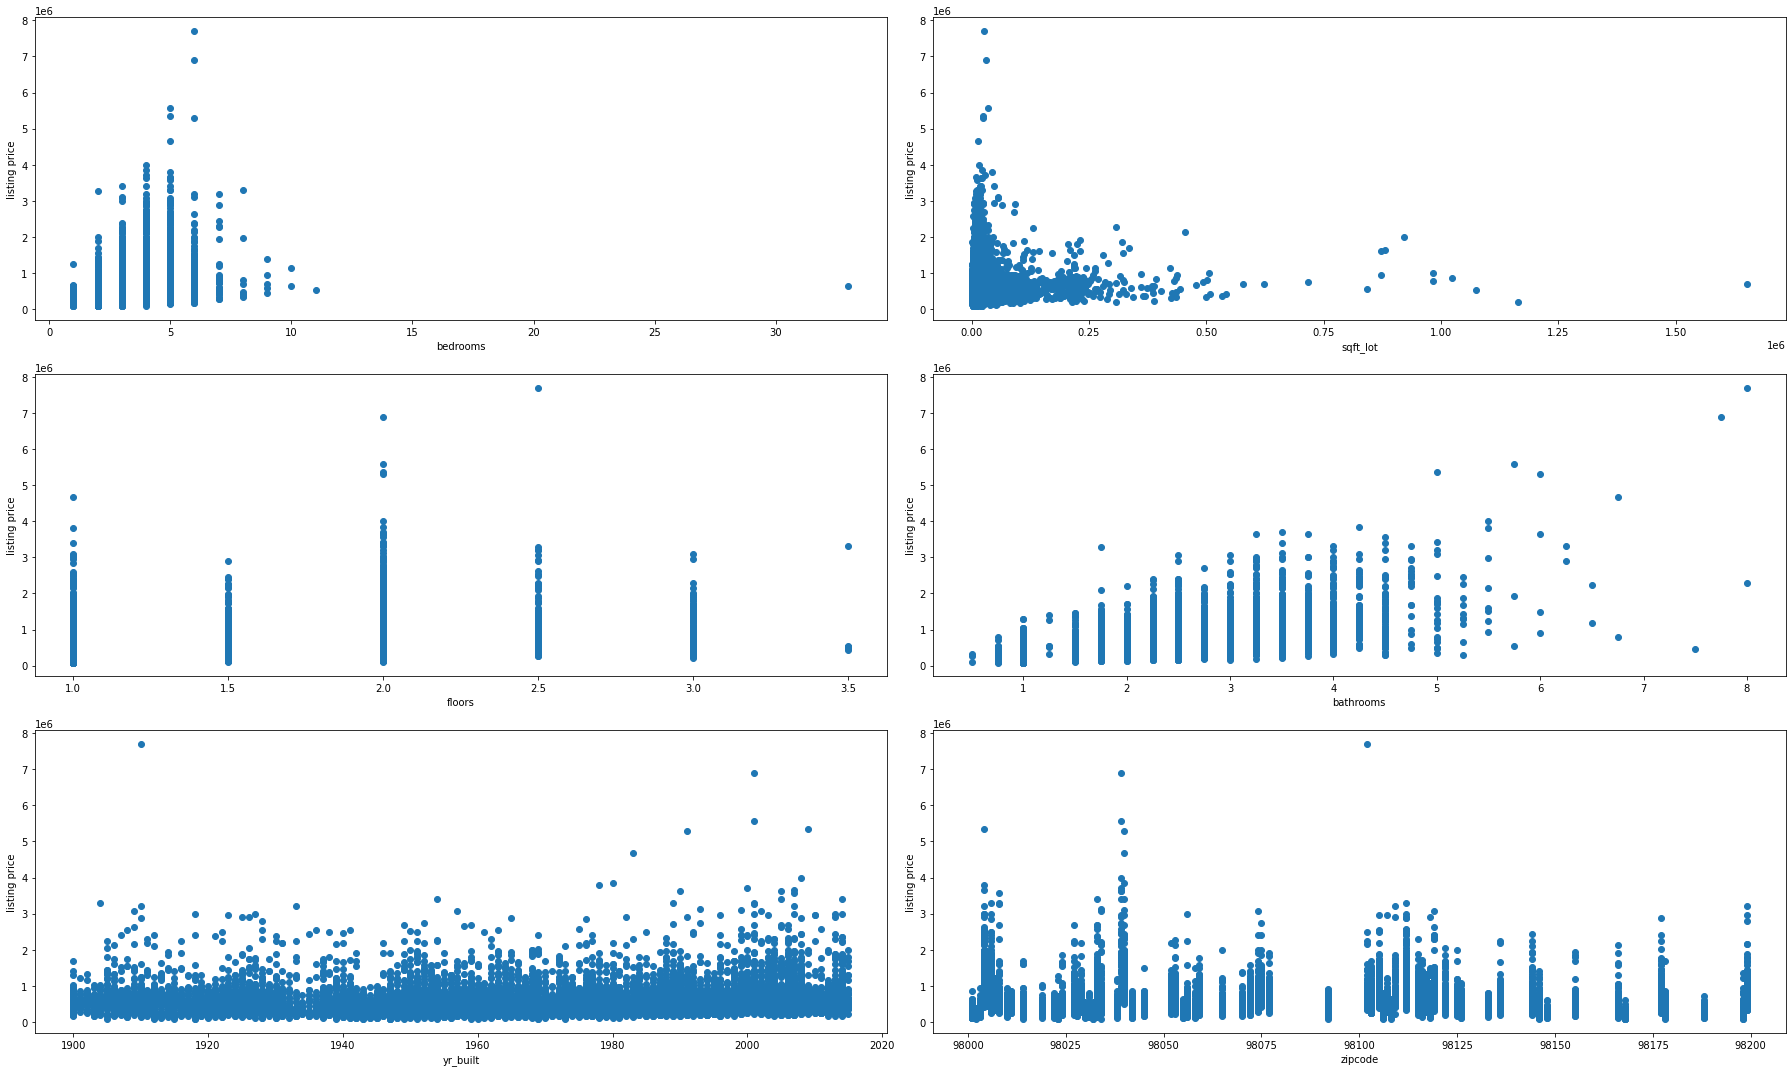

In [40]:
#Plotting scatter plots of numerical values exept sqft_living
X_train_plot = X_train[numerical]

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(25, 15))
fig.set_tight_layout(True)

for ide, c in enumerate(X_train_plot.columns):
    ax = axes[ide//2][ide%2]
    ax.scatter(X_train_plot[c], y_train)
    ax.set_xlabel(c)
    ax.set_ylabel("listing price")
    
plt.savefig("images/Pairwise_4", dpi=99)

Checking for assumptions of model for all the  numerical features . 

From the continous features sqft_living is the most linear, but skewed. The other skewed continous features is the sqft_lot.

Log transformations will be performed on the sqft_living and sqft_lot because of their skewness.
 We will treat bathrooms,bedrooms, floors, zipcode , cond_num, grade_num, and yr_built as discrete variables and
 
"A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values." Ref: [Phase 2 Module 20, Feature Scaling and Norm](https://github.com/learn-co-curriculum/dsc-feature-scaling-and-normalization-lab/tree/solution)

---

###  Data processing and transformation

Certain features from the dataset will be transformed. Log transformations will be performed on the sqft features and the "price" to normalize their data, due to their skewness. Because we already transformed the "condition" and "grade" features to numbers, we will apply the One Hot Encoding transformation to the "Waterfront" categorical feature.

The  process of transforming the features. 
Ref Naming Categories after OHE: [Codementor](https://www.codementor.io/@abdelfettahbesbes/one-hot-encoding-in-data-science-1pe0lftu21)

In [41]:
#Setting column names for one hot encoded variables 
categoricals
cat_cols_encoded = []
for col in categoricals:
    cat_cols_encoded += [f"{col[0:2]}_{cat}" for cat in list(X[col].unique())]


In [42]:
cat_cols_encoded

['wa_Unk', 'wa_NO', 'wa_YES']

Reminder, only some of the features will be transformed based on their type.

In [43]:
#Creating a list of the features to transform

#Features going through log-transformaiton
log_feat = ["sqft_lot", "sqft_living"]
#Features that will not be transformed
discrete_col= ["bathrooms","bedrooms","yr_built","zipcode","floors", "cond_num", "grade_num"]
#OHE features
categoricals = ['waterfront']


In [44]:
#Reshape Y training data to support modeling without error for single arrays

Y_array_train = np.array(y_train)
y_trainarr = Y_array_train.reshape(-1,1)

#Reshape the test data to support modeling without error for single arrays
Y_array_test = np.array(y_test)
y_testarr = Y_array_test.reshape(-1,1)

The below code fits and transforms the data. The datasets are then fitting and transforming data. The X and y train and test datasets are being transformed. Because the X and y are different sets they have different transformers applied.

In [45]:
#  import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
log_transformer_y = FunctionTransformer(np.log, validate=True)
# OHE instantiation. Will drop a value after the concatenation
ohe = OneHotEncoder(sparse=False) 

#Fitting data
#log_feat = ["sqft_lot", "sqft_living"]
log_transformer.fit(X_train[log_feat])
#categoricals = ['waterfront']
ohe.fit(X_train[categoricals])
# ["price"]
log_transformer_y.fit(y_testarr  )

#Train Transformations
X_train_log = log_transformer.transform(X_train[log_feat])
X_train_ohe = ohe.transform(X_train[categoricals])
y_train_log = log_transformer_y.transform(y_trainarr)

#Test Transformation
X_test_log = log_transformer.transform(X_test[log_feat])
X_test_ohe = ohe.transform(X_test[categoricals])
y_test_log = log_transformer_y.transform(y_testarr)


#Concatenate transformed trained data into one dataframe. Keeping the same index as the original training data

X_train_sec = pd.concat([
        pd.DataFrame(X_train_log, columns= log_feat, index=X_train.index),
        pd.DataFrame(X_train[discrete_col], columns= discrete_col, index=X_train.index),
        pd.DataFrame(X_train_ohe, columns = cat_cols_encoded, index=X_train.index)
        ], axis=1)

#Concatenate transformed test data.
X_test_sec = pd.concat([
        pd.DataFrame(X_test_log, columns=log_feat, index=X_test.index),
        pd.DataFrame(X_test[discrete_col], columns= discrete_col, index=X_test.index),
        pd.DataFrame(X_test_ohe, columns = cat_cols_encoded, index=X_test.index)
        
    ], axis=1)

#Converting the original y log array to a series with the original shape and an index
y_train_log = pd.Series(data=y_train_log.reshape((y_train.shape)), index=X_train.index)
y_test_log = pd.Series(data=y_test_log.reshape((y_test.shape)), index=X_test.index)


In [46]:
#checking data shapes columns added after OHE
print( X_train_sec.shape, X_test_sec.shape)

(17272, 12) (4318, 12)


In [47]:
#Drop the first col of each ohe CAT to reduce multicollinarity
X_train_sec= X_train_sec.drop(['wa_Unk'], axis=1)
X_test_sec= X_test_sec.drop(['wa_Unk'], axis=1)

In [48]:
#Checking shape
print( X_train_sec.shape,X_test_sec.shape)


(17272, 11) (4318, 11)


### Scoring and Predicting Cat and Numericals 

Scoring and predicting after transformations occurred. 

In [49]:
#Initializing model
linreg_sec = LinearRegression(normalize= True)

#Fitting training data
linreg_sec.fit(X_train_sec, y_train_log)
linreg_sec.fit(X_test_sec, y_test_log)
LinearRegression()

LinearRegression()

In [50]:
#Splitting the dataset in three sections with a .3 test size
splitter = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

#Modeling second model 
second_scores = cross_validate(
    estimator=linreg_sec,
    X=X_train_sec,
    y=y_train_log,
    return_train_score=True,
    cv=splitter
)

In [51]:
#Y price Predictions for training and testing features
y_hat_train_sec = linreg_sec.predict(X_train_sec)
y_hat_test_sec = linreg_sec.predict(X_test_sec)

#Root Mean Square Error (if squared is set to False) It is low becauase of the logged y value
train_rmse_sec = mean_squared_error(y_train_log, y_hat_train_sec, squared = False)
test_rmse_sec = mean_squared_error(y_test_log, y_hat_test_sec, squared = False)


In [52]:
#Print out of errors and scores for current and previous models

print('Current Train RMSE (logged): ', train_rmse_sec)
print('Current Test RMSE(logged): ', test_rmse_sec)
print()
#Mean of the Current kfold validation scores
print("Current Model Kfold Train score:     ", second_scores["train_score"].mean())
print("Current Model Validation score:", second_scores["test_score"].mean())
print()
#Mean of the traing validation scores
print("Baseline Models:")
print("Previous Kfold Train mean score:     ", baseline_scores["train_score"].mean())
print("Previous Kfold Validation mean score:", baseline_scores["test_score"].mean())
print()
#Train and validation Scores
print('Previous Train/Test Split Train Model Score: ', Model_train_score)
print('Previous Train/Test Split Validation Model Score: ', Model_score)

Current Train RMSE (logged):  0.3148336380868248
Current Test RMSE(logged):  0.30755351160737365

Current Model Kfold Train score:      0.6446907194384797
Current Model Validation score: 0.6414405396108452

Baseline Models:
Previous Kfold Train mean score:      0.4884772214299433
Previous Kfold Validation mean score: 0.5000072841051805

Previous Train/Test Split Train Model Score:  0.49091149233831743
Previous Train/Test Split Validation Model Score:  0.494749423259338


The current RMSE of the test data is less than that of the training data. This means the model is more generalized than before.  The values are still higher than 0, but have decreased substantially with the transformations.  

The current model has increase the R2 score for the validation model by ~(.14).  This means we increased 
the ability for our model to understand the variance in the model by 14%. The validation model is not better than the train model score, there might be a slight overfitting if we use this.

So far we will keep this current model and improve.

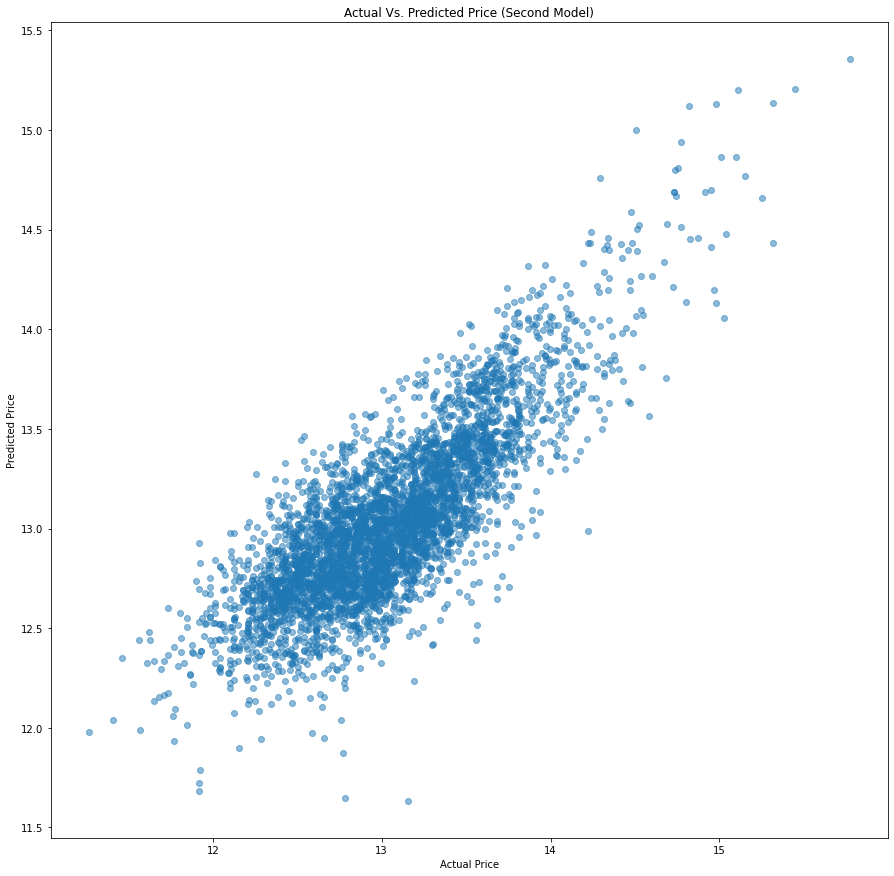

In [53]:
#plotting the linearity zoomed in
fig, ax = plt.subplots(figsize = (15,15))

ax.scatter(y_test_log, y_hat_test_sec, alpha=0.5)
ax.set_title("Actual Vs. Predicted Price (Second Model)")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
#plt.xlim([0, 2500000])

plt.savefig("images/Act_Pred_5.png", dpi=99)

The predicted data is being plotted for a perfect fitted line.  The graph shows linearity up until ~1 Million dollars,
but a high number of outliers after this point.


# Investigating Multicollinearity

Looking into further multicollinearity of the data.  We want the features to be independent. The less they are, the more they can alter the model's fit.

In [54]:
#Reviewing current columns in model
X_train_sec.columns

Index(['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_built',
       'zipcode', 'floors', 'cond_num', 'grade_num', 'wa_NO', 'wa_YES'],
      dtype='object')

In [55]:
#Using statsmodel to view statstics on the model
import statsmodels.api as sm

#Build model
stats_model = sm.OLS(y_train_log, sm.add_constant(X_train_sec)).fit()

#View model
stats_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     2837.
Date:                Mon, 09 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:20:33   Log-Likelihood:                -4523.4
No. Observations:               17272   AIC:                             9071.
Df Residuals:                   17260   BIC:                             9164.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3025      5.076      0.060      0.952      -9.646      10.251
sqft_lot       -0.0397      0.003    -12.423      0.000      -0.046      -0.033
sqft_living     0.4395      0.012     36.579      0.000       0.416       0.463
bathrooms       0.0848      0.006     15.413      0.000       0.074       0.096
bedrooms       -0.0389      0.003    -11.436      0.000      -0.046      -0.032
yr_built       -0.0059      0.000    -52.006      0.000      -0.006      -0.006
zipcode         0.0002   5.08e-05      3.878      0.000    9.75e-05       0.000
floors          0.0450      0.006      7.626      0.000       0.033       0.057
cond_num        0.0370      0.004      9.129      0.000       0.029       0.045
grade_num       0.2348      0.003     70.474      0.000       0.228       0.241
wa_NO          -0.0053      0.008     -0.688      0.491      -0.020       0.010
wa_YES          0.5477      0.031     17.856      0.000       0.488       0.608
==============================================================================
Omnibus:                       75.352   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.717
Skew:                          -0.014   Prob(JB):                     1.82e-23
Kurtosis:                       3.380   Cond. No.                     2.08e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Which ones features should be eliminated based on p value? We are assuming alpha level (significance level) of .05.
If the p-value is above this, this let's us know we should reject these features. This is based on a hypothesis that these features are meaningful to the model. 


Looks like there is a lot of multicolinearity in the model. The features that are above the needed p-value are: 
- **"wa_NO"** .

Also, both "wa_NO" coefficient and the "zipcode" are outside of the confidence intervals, meaning they are outliers. 
The two most significant coefficients are the "grad_num" and "sqft_living based on their std_err and high t value

Ref Statsmodel Interpretation[Tim McAleer, 2020](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a)

We will run Recursive Feature Evaluation (RFE) to see if some of the same values are chosen to be removed.

## Feature Recommendations with RFECV

Feature selection method that elimates the weakest features depening on settings.

In [56]:
from sklearn.feature_selection import RFECV
#Features must be scaled to be used
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)


X_train_for_RFECV = StandardScaler().fit_transform(X_train_sec)

#Initiate linear Refression model
model_for_RFECV = LinearRegression()


# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train_log)


# Print the results Ref: [Phase 2, Topic 20, Linear Regression Lab]
print("Non Recommended Features")
#Creates a fist for Reocmmended dropped columns
#The recommended dropped features will be False. If False, add to list RFECV_rec_drop_col = []
RFECV_rec_drop_col = []
for index, col in enumerate(X_train_sec.columns):
    if selector.support_[index] == False:
        print(f"{col}: {selector.support_[index]}")
        RFECV_rec_drop_col.append(col)

Non Recommended Features
wa_NO: False


In [57]:
print("Rec P-value based drop: " "co_Poor","wa_NO" )
print("Rec RFECV based drop: ",  RFECV_rec_drop_col )

Rec P-value based drop: co_Poor wa_NO
Rec RFECV based drop:  ['wa_NO']


The RFECV method methods agrees on dropping all the same features as the p-value test. On the next model all of the recommended features will be dropped.

In [58]:
#Checking current columns
X_train_sec.columns

Index(['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_built',
       'zipcode', 'floors', 'cond_num', 'grade_num', 'wa_NO', 'wa_YES'],
      dtype='object')

In [59]:
#Dropping features from both training and test set separately
X_train_sec_drop = X_train_sec.drop( RFECV_rec_drop_col, axis =1)   
X_test_sec_drop = X_test_sec.drop( RFECV_rec_drop_col, axis =1)   

In [60]:
#Checking current shape
print( X_train_sec_drop.shape,X_test_sec_drop.shape)

(17272, 10) (4318, 10)


In [61]:
#Check the stats model with the dataset (with wa_NO removed)
model = sm.OLS(y_train_log, sm.add_constant(X_train_sec_drop)).fit()

#Model the stats model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     3120.
Date:                Mon, 09 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:20:33   Log-Likelihood:                -4523.7
No. Observations:               17272   AIC:                             9069.
Df Residuals:                   17261   BIC:                             9155.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3710      5.075      0.073      0.942      -9.576      10.318
sqft_lot       -0.0397      0.003    -12.424      0.000      -0.046      -0.033
sqft_living     0.4394      0.012     36.576      0.000       0.416       0.463
bathrooms       0.0848      0.006     15.413      0.000       0.074       0.096
bedrooms       -0.0389      0.003    -11.432      0.000      -0.046      -0.032
yr_built       -0.0059      0.000    -52.013      0.000      -0.006      -0.006
zipcode         0.0002   5.08e-05      3.865      0.000    9.68e-05       0.000
floors          0.0450      0.006      7.629      0.000       0.033       0.057
cond_num        0.0370      0.004      9.125      0.000       0.029       0.045
grade_num       0.2349      0.003     70.482      0.000       0.228       0.241
wa_YES          0.5483      0.031     17.883      0.000       0.488       0.608
==============================================================================
Omnibus:                       75.119   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.330
Skew:                          -0.014   Prob(JB):                     2.21e-23
Kurtosis:                       3.380   Cond. No.                     2.08e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Even though features were dropped, the model still suggests a high multicollinearity and the same  R2 score.  We will be using the model for 
predictions and not specifically inferences on the features and their impacts. We can ignore this for now and continue on.

# Best Features Model (3)

We will take the best features we have left and train the next model. The best features so far include:
- 'sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_built',
-  'zipcode', 'floors', 'cond_num', 'grade_num', 'wa_YES'


In [62]:
#Setting new dataframe for third model
X_train_third = X_train_sec_drop
X_test_third = X_test_sec_drop

In [63]:
#Printing current columans
X_train_third.columns

Index(['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_built',
       'zipcode', 'floors', 'cond_num', 'grade_num', 'wa_YES'],
      dtype='object')

In [64]:
#Split values for the cv
splitter = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

#Initiating the Estimator
third_model = LinearRegression()

#Scoring using the esimator and training data
third_scores = cross_validate(
    estimator=third_model,
    X=X_train_third,
    y=y_train_log,
    return_train_score=True,
    cv=splitter
)

In [65]:
#Initializing model
#third_model = LinearRegression(normalize= True)

#Fitting training data
third_model.fit(X_train_third, y_train_log)
third_model.fit(X_test_third, y_test_log)
LinearRegression()

LinearRegression()

In [66]:
#Y price Predictions for training and testing features
y_hat_train_third = third_model.predict(X_train_third)
y_hat_test_third = third_model.predict(X_test_third)

#Root Mean Square Error (if squared is set to False)
train_rmse_third = mean_squared_error(y_train_log, y_hat_train_third, squared = False)
test_rmse_third = mean_squared_error(y_test_log, y_hat_test_third, squared = False)

In [67]:
#Print out of errors and scores for current and previous models

print('Current Train RMSE ', train_rmse_third)
print('Current Test RMSE: ', test_rmse_third)
print()
#Mean of the Third validation scores
print('Current Train Model Mean Score: ', third_scores["train_score"].mean())
print('Current Validation Model Mean Score: ', third_scores["test_score"].mean())
print()
#Mean of the Current kfold validation scores
print("Second Model Kfold Train Mean score:     ", second_scores["train_score"].mean())
print("Second Model Validation Mean score:", second_scores["test_score"].mean())
print()
#Mean of the traing validation scores
print("Baseline Models:")
print("Previous Kfold Train Mean Score:     ", baseline_scores["train_score"].mean())
print("Previous Kfold Validation Mean Score:", baseline_scores["test_score"].mean())
print()
#Train and validation Scores
print('Previous Train/Test Split Train Model Score: ', Model_train_score)
print('Previous Train/Test Split Validation Model Score: ', Model_score)

Current Train RMSE  0.3147718460539656
Current Test RMSE:  0.3075890371545622

Current Train Model Mean Score:  0.644673314060476
Current Validation Model Mean Score:  0.6414594822403191

Second Model Kfold Train Mean score:      0.6446907194384797
Second Model Validation Mean score: 0.6414405396108452

Baseline Models:
Previous Kfold Train Mean Score:      0.4884772214299433
Previous Kfold Validation Mean Score: 0.5000072841051805

Previous Train/Test Split Train Model Score:  0.49091149233831743
Previous Train/Test Split Validation Model Score:  0.494749423259338


In [68]:
print('Current Train Model Scorea: ', third_scores["train_score"])
print('Current Validation Model Scores: ', third_scores["test_score"])

Current Train Model Scorea:  [0.64160177 0.64360325 0.64881492]
Current Validation Model Scores:  [0.64847415 0.643949   0.6319553 ]


There isn't a big change in the third and second model R2 score even after feature selection. The test validation increased slightly as the train score decreased.  They are vary smilar though. When looking at the specic fold splits, we can see there are runs where the validation score was larger than the training score.   


# Final model (4)

After modeling three iterations at similar score of ~.65 for the training and validation data, 
a final model will be fit and used for prediciton using the last dataset. 

In [69]:
#Transform data set by changing the condition or grade and try to predict on final model
X_train_final = X_train_third
X_test_final = X_test_third

In [70]:
#With unlogged y variables for R2 and RMSE score
from sklearn.metrics import mean_absolute_error

#Ref Linear Regression Model 20

#Initiate Linear Regression model
final_lin = LinearRegression()

# Fit the model on X_train_final and y_train
final_lin.fit(X_train_final, y_train_log)

# Score the model on X_test_final and y_test
train_final_score = final_lin.score(X_train_final, y_train_log)
test_final_score = final_lin.score(X_test_final, y_test_log)

#The train and test model predict the y predictors
y_hat_train_fin = final_lin.predict(X_train_final)
y_hat_test_fin = final_lin.predict(X_test_final)

#unlog y_train and test for RMSE and MAE error
y_train_exp_fin = np.exp(y_train_log)
y_test_exp_fin = np.exp(y_test_log)
y_train_pred_exp_fin = np.exp(y_hat_train_fin)
y_test_pred_exp_fin = np.exp(y_hat_test_fin)

#Mean Square erorr of the known y and predictors
unlogged_train_rmse = round(np.sqrt(mean_squared_error(y_train_exp_fin, y_train_pred_exp_fin, squared= True)),0)
unlogged_test_rmse = round(np.sqrt(mean_squared_error(y_test_exp_fin, y_test_pred_exp_fin, squared = True)),0)

unlogged_train_mae = round(mean_absolute_error(y_train_exp_fin, y_train_pred_exp_fin),0)
unlogged_test_mae = round(mean_absolute_error(y_test_exp_fin, y_test_pred_exp_fin),0)

In [71]:
#Final RMSE and R2 Scores
print('Final Unlogged Train Mean Squared Error:', unlogged_train_rmse)
print('Final Unlogged Test Mean Squared Error: ', unlogged_test_rmse)
print()
print('Final Unlogged Train Mean Absolute Error:', unlogged_train_mae)
print('Final Unlogged Test Mean Absolute Error: ', unlogged_test_mae)
print()
print('Final Train Model Score: ', round(train_final_score,3))
print('Final Test Model Score: ', round(test_final_score,3))


Final Unlogged Train Mean Squared Error: 206364.0
Final Unlogged Test Mean Squared Error:  196739.0

Final Unlogged Train Mean Absolute Error: 131095.0
Final Unlogged Test Mean Absolute Error:  127332.0

Final Train Model Score:  0.644
Final Test Model Score:  0.657


In [72]:
print(f"Final model test score is {round(test_final_score,3)} is higher than the the training model.\nThis helps us know the model is not overfitted.\n")

#Will use RMSE for this model
print(f"The current model's RMSE is {unlogged_test_rmse} and MAE is {unlogged_test_mae}.")

Final model test score is 0.657 is higher than the the training model.
This helps us know the model is not overfitted.

The current model's RMSE is 196739.0 and MAE is 127332.0.


# Interpret Final Model (5)

Interpreting final model against linearity assumptions.


Ref Interpreation Code: [Phase 2, Topic 20 Linear Reg Lab](https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution)


In [73]:
print(pd.Series(final_lin.coef_, index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_lin.intercept_)

sqft_lot      -0.039696
sqft_living    0.439416
bathrooms      0.084826
bedrooms      -0.038859
yr_built      -0.005880
zipcode        0.000196
floors         0.045027
cond_num       0.036963
grade_num      0.234864
wa_YES         0.548252
Name: Coefficients, dtype: float64

Intercept: 0.3709916228143566


In [74]:
## Three coefficients that impact the price of the home

#Grade - Indep variable, not logged, Target Logged
#(exp(coeff)-1)*100 = % of increase of target variable
grade_per = round(((np.exp(.23) -1)*100),0)

#Condition - Indep variable, not logged, Target Logged
#(exp(coeff)-1)*100 = % of increase of target variable
cond_per = round(((np.exp(.03) -1)*100),0)

#Sqft Living - Both independent and dependent/target variable logged
#(1.x**(coeff)-1)*100 = % of increase of target
inc_per = 5
sqft_per = round((((1+inc_per*.1)**(.44)-1)*100),0)


In [75]:

#We will highlight three coeffieents that have been evaluated after log transformations:

print("Feature Coeffecient Impacts\n")
print(f"Grade Feature: For every one-unit increase in the Grade, the home value increases by about {grade_per} %.\n")
print(f"Condition Feature: For every one-unit increase in the Condition, the home value increases by about {cond_per} %.\n")
print(f"Sqft_living Feature: For every {inc_per}% increase in the sqft, the home value by about {sqft_per} %.\n")
    


Feature Coeffecient Impacts

Grade Feature: For every one-unit increase in the Grade, the home value increases by about 26.0 %.

Condition Feature: For every one-unit increase in the Condition, the home value increases by about 3.0 %.

Sqft_living Feature: For every 5% increase in the sqft, the home value by about 20.0 %.



### Linear Regression Assumption

No handles with labels found to put in legend.


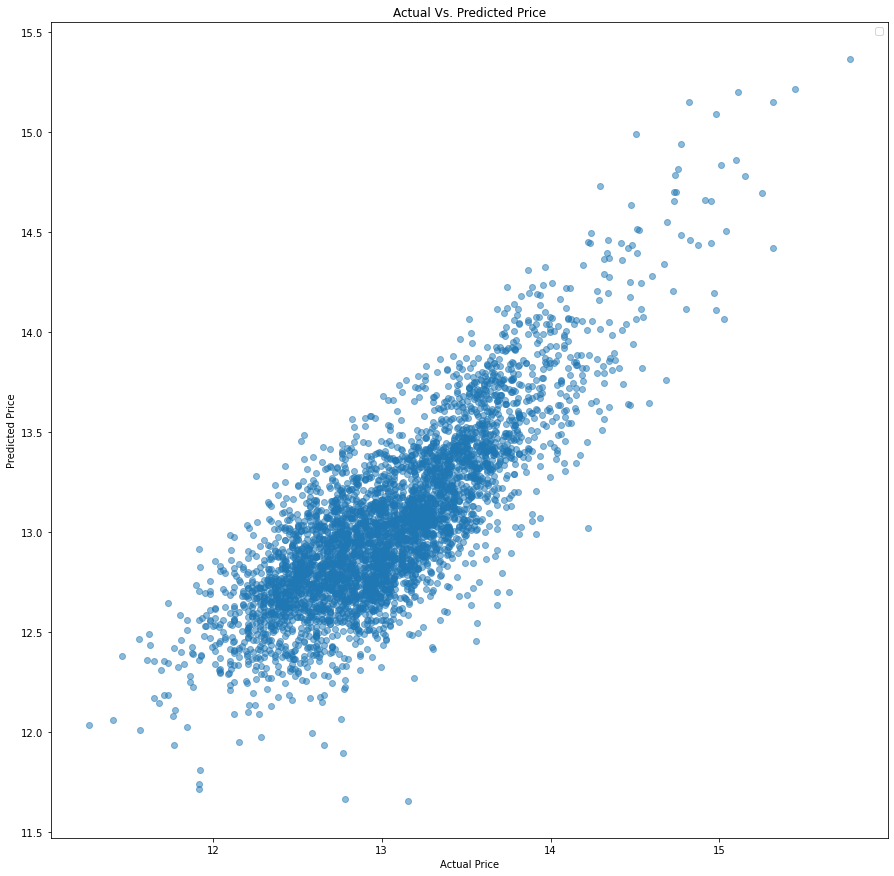

In [76]:
fig, ax = plt.subplots(figsize = (15,15))

perfect_line = np.arange(y_test_log.min(), y_test_log.max())
ax.scatter(y_test_log, y_hat_test_fin, alpha=0.5)
ax.set_title("Actual Vs. Predicted Price")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")

ax.legend();

plt.savefig("images/Lin_Assump6.png", dpi=99)

The perfect line is parallel to the scatter plot. The scatter plot has the same linear shape. It is still considered linear. 

### Normality Assumption
Model Regression[Ref: Phase 2, Model Reggression Lab Video]()

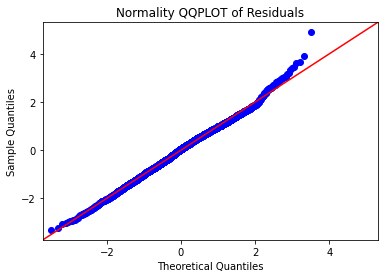

In [77]:
import scipy.stats as stats
residuals = (y_test_log - y_hat_test_fin)
#QQPLOT 
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);
plt.title("Normality QQPLOT of Residuals")

plt.savefig("images/Normality_7.png", dpi=99)

Using the QQ plot shows normality with a slight offshoot at the end.  

### Multicollinearity

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Variance Inflation Factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

sqft_lot        137.239768
sqft_living    1440.908390
bathrooms        26.860744
bedrooms         24.645905
yr_built       7382.348064
zipcode        8235.823316
floors           15.333726
cond_num         33.895878
grade_num       116.375693
wa_YES            1.024235
Name: Variance Inflation Factor, dtype: float64

Wow! All the numerical values and two grade categorical values have high VIF except for "wa_Yes".  There is a strong multicollinarity between these features. Dropping some of these features will support the multicollinearity problem. It is not clear what is the best combination of features is the most effective for our problem.  (In a different iteration, not pictured, some of  these were dropped after these results; the multicollinearity dropped, but also the R2 score.)

Because we are using this model for prediction and not inference we can keep using the trained fitted model. If the goal is to understand specific individual features and how they impact the model, then multicollinearity is a major issue that needs to be solved.

### Homoescdasticity

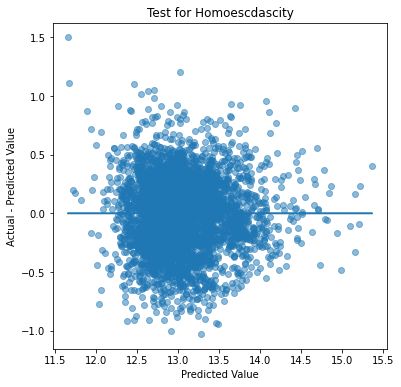

In [79]:
fig, ax = plt.subplots(figsize = (6,6))
#Scatter plot of predictions and residuals
ax.scatter(y_hat_test_fin, residuals, alpha=0.5)
ax.plot(y_hat_test_fin, [0 for i in range(len(X_test_final))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");
ax.set_title("Test for Homoescdascity")

plt.savefig("images/Homoesc_8.png", dpi=99)

Most of the residuals are homoescadastic.  There are still plenty of outliers that can be drop or dealt with. Even with the outliers it generally passess the test.

## Model Feedback

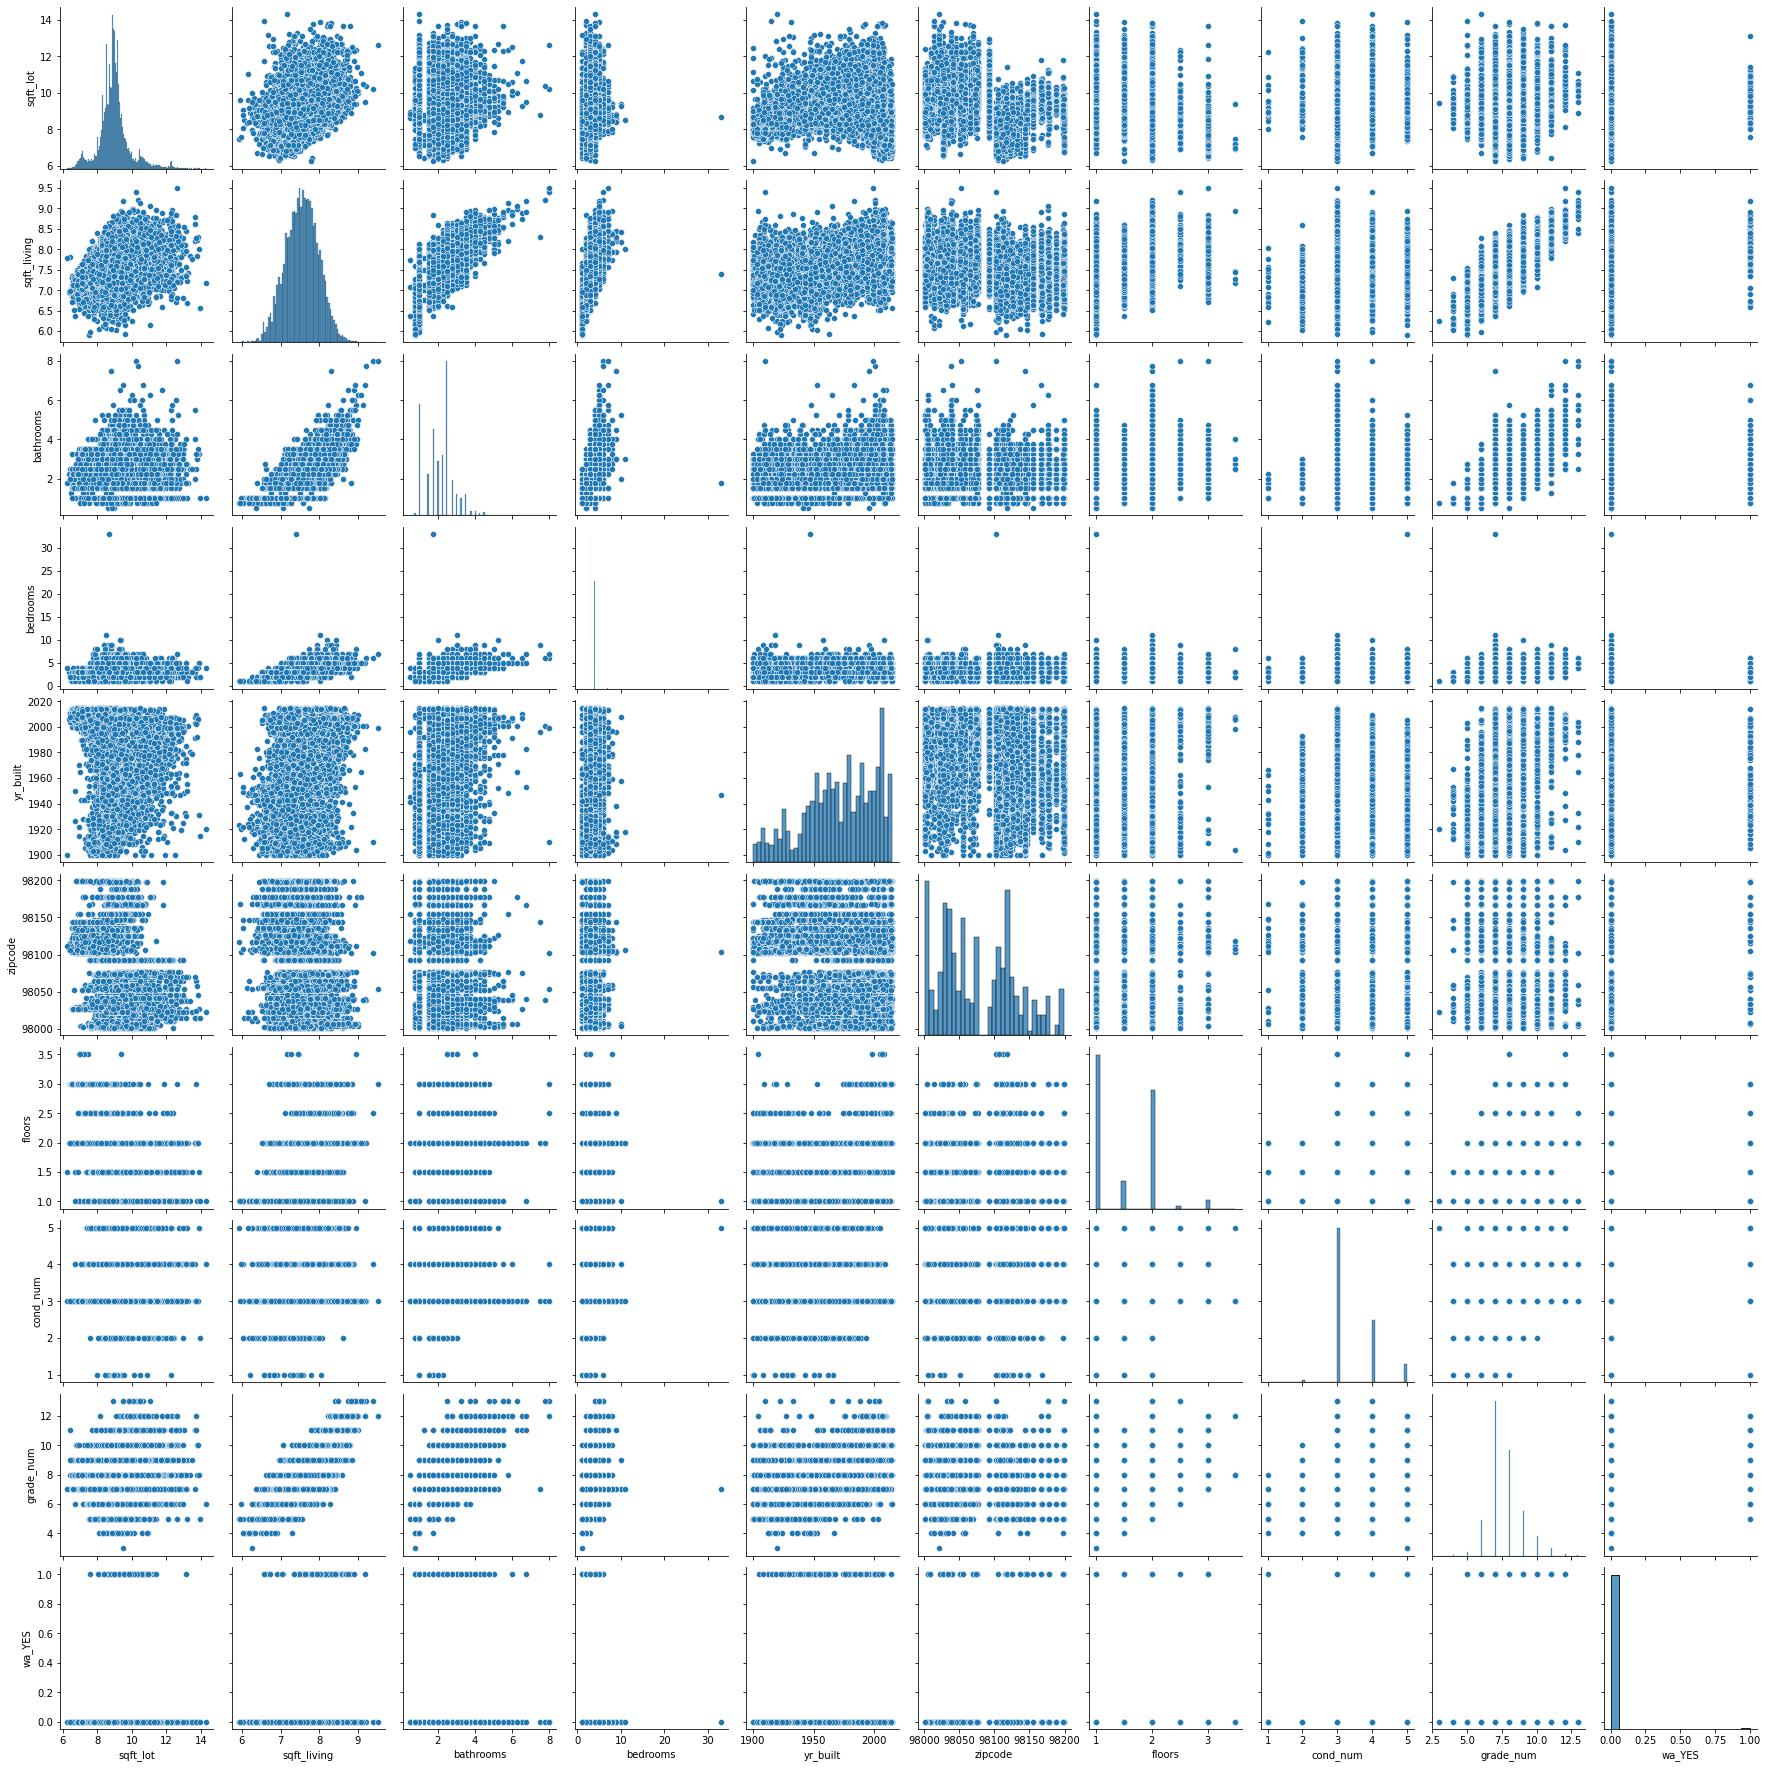

In [80]:
#Looking at the final dataset in the pairplot
sns.pairplot(X_train_final)
plt.savefig("images/Pair_10.png", dpi=99)

# Model Prediction

The best fit model will be used to make predictions for homes that have home improvements. In this case the "condition" and "grade" features for a specific group of homes in certain zipcodes. The top five zipcodes that have the most homes with a "**condition" of 3-Good or less & a "grade" of 6-Low Average or less**". The chosen homes will all be modified to have a condition of "4-Good and a grade of 8-Good

These predictions will serve as samples for the real estate agents to understand the benefit of real estate data analysis. Because home value can depend on the surrounding community, grouping the homes for predictions by zipcodes helps the agent target a specific community for an extra benefit.


---

## Dataframe Evaluation and Manipulation

In [81]:
#Copy the original dataset (with waterfront, condition and grade processed)
imp_df = kc_df.copy()
imp_df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,cond_num,grade_num
id,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,Unk,1955,98178,3,7
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,1951,98125,3,7
5631500400,180000.0,2,1.00,770,10000,1.0,NO,1933,98028,3,6
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,1965,98136,5,7
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,1987,98074,3,8


Filter the data based on certain condition and grade criteria.  The grade and condition values are mapped above and explained on [King County Glossary](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

In [82]:
#Filter the grades meeting the criteria
re_build = imp_df[(imp_df.grade_num <= 6) & (imp_df.cond_num <= 3) ].sort_values(by = "grade_num", ascending= False)

In [83]:
#Filtering the zipcodes and choose the highest amount of homes
re_build.groupby(["zipcode"]).count().sort_values(["cond_num"], ascending= False, inplace = True)

In [84]:
#Creating a list from the top amount of homes 
#Use isin to find the specific zipcodes in the list
filt_zcode = [98118,98168,98146,98106,98126]
re_filt = re_build[re_build.zipcode.isin(filt_zcode)]
re_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 3395800155 to 2114700090
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        438 non-null    float64
 1   bedrooms     438 non-null    int64  
 2   bathrooms    438 non-null    float64
 3   sqft_living  438 non-null    int64  
 4   sqft_lot     438 non-null    int64  
 5   floors       438 non-null    float64
 6   waterfront   438 non-null    object 
 7   yr_built     438 non-null    int64  
 8   zipcode      438 non-null    int64  
 9   cond_num     438 non-null    int64  
 10  grade_num    438 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 41.1+ KB


There are 438 entries that fit the criteria from the top five zipcode.

In [85]:
#Reviewing the grade values
re_filt["grade_num"].value_counts()

6    396
5     37
4      5
Name: grade_num, dtype: int64

In [86]:
#Reviewing the condition values
re_filt["cond_num"].value_counts()

3    399
2     33
1      6
Name: cond_num, dtype: int64

In [87]:
#Look at how the attributes for the columns changes
re_filt.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode,cond_num,grade_num
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,253603.541096,2.600457,1.147260,1104.963470,7541.929224,1.098174,1937.484018,98133.675799,2.897260,5.892694
std,96721.581601,0.916515,0.356379,385.561368,4602.033460,0.215416,16.480027,22.240518,0.346201,0.344810
min,78000.000000,1.000000,0.500000,380.000000,1642.000000,1.000000,1900.000000,98106.000000,1.000000,4.000000
25%,190000.000000,2.000000,1.000000,830.000000,5085.000000,1.000000,1925.000000,98118.000000,3.000000,6.000000
50%,244250.000000,2.000000,1.000000,1025.000000,6333.500000,1.000000,1942.000000,98126.000000,3.000000,6.000000
75%,300000.000000,3.000000,1.000000,1307.500000,8221.000000,1.000000,1948.000000,98146.000000,3.000000,6.000000
max,795000.000000,6.000000,3.000000,2710.000000,49658.000000,2.000000,2000.000000,98168.000000,3.000000,6.000000


In [88]:
#Checking which features are the most correlated with price
re_filt.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode,cond_num,grade_num
price,1.000000,0.167822,0.201698,0.307478,-0.172134,0.176807,-0.237924,-0.339209,0.133077,0.248845
bedrooms,0.167822,1.000000,0.374962,0.627679,-0.007657,0.448324,0.032831,0.006204,0.129963,0.247798
bathrooms,0.201698,0.374962,1.000000,0.525424,-0.040053,0.224834,-0.029989,-0.048096,0.025534,0.142854
sqft_living,0.307478,0.627679,0.525424,1.000000,0.049063,0.440787,-0.039116,0.062236,0.129319,0.296250
sqft_lot,-0.172134,-0.007657,-0.040053,0.049063,1.000000,0.043095,0.120375,0.391710,-0.128576,-0.041478
floors,0.176807,0.448324,0.224834,0.440787,0.043095,1.000000,-0.130731,0.022898,0.104872,0.080536
yr_built,-0.237924,0.032831,-0.029989,-0.039116,0.120375,-0.130731,1.000000,0.247452,0.022373,-0.021847
zipcode,-0.339209,0.006204,-0.048096,0.062236,0.391710,0.022898,0.247452,1.000000,-0.038811,-0.051693
cond_num,0.133077,0.129963,0.025534,0.129319,-0.128576,0.104872,0.022373,-0.038811,1.000000,0.290825
grade_num,0.248845,0.247798,0.142854,0.296250,-0.041478,0.080536,-0.021847,-0.051693,0.290825,1.000000


We want to change the values of all the condition and grade features in the scoped dataset. 

In [89]:
#Create a new dataframe as a baseline for changing the condition and grade values.
re_new = re_filt.copy()
# Change the grade and conditions to the goal values
re_new["grade_num"] = 8
re_new["cond_num"] =  4

In [90]:
#Review the dataframe
re_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,cond_num,grade_num
id,,,,,,,,,,,
3395800155,250000.0,3,1.00,990,8100,1.0,NO,1949,98146,4,8
8122600145,452000.0,4,2.00,1660,6150,1.0,NO,1945,98126,4,8
8019200925,315000.0,5,1.75,1850,14800,1.5,NO,1937,98168,4,8
1443500120,310000.0,2,1.00,750,5379,1.0,NO,1919,98118,4,8
798000145,244500.0,2,1.75,1300,14500,1.0,NO,1939,98168,4,8


## Data Transformation

In [91]:
#Split the data between dependent and the independent variables. 
#The target variable will only be used to compare the predictor
X_re_new = re_new.drop("price", axis = 1)
y_re_new = re_new["price"]


In [92]:
#Creating a lists for the features to transform
#Features going through log-transformaiton
log_feat = ["sqft_lot", "sqft_living"]
#Features that will not be transformed
discrete_col= ["bathrooms","bedrooms","yr_built","zipcode","floors", "cond_num", "grade_num"]
#OHE features
categoricals = ['waterfront']


In [93]:
#Creating new column labels
#The X_train is used because it has the entire set of values for Waterfront. 
#The dataset used for prediction has no "Yes" values
categoricals
cat_cols_re = []
for col in categoricals:
    cat_cols_re += [f"{col[0:2]}_{cat}" for cat in list(X_train[col].unique())]


In [94]:
#Display the column names
cat_cols_re


['wa_NO', 'wa_Unk', 'wa_YES']

In [95]:
#Reshape Y training data to support modeling without error for single arrays
y_array_re = np.array(y_re_new)
y_re = y_array_re.reshape(-1,1)

Below we are transforming the data like the previous trained and test data. Because we are using a previously created model, we do not need to initiate and fit the models again. It has already been done.

In [96]:
#  import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer

#The transformers wer

#Test Transformation
X_re_log = log_transformer.transform(X_re_new[log_feat])
X_re_ohe = ohe.transform(X_re_new[categoricals])
y_re_log = log_transformer_y.transform(y_re)

#Concatenate transformed train data. Keeping the same index as the original training data

X_re_pred = pd.concat([
        pd.DataFrame(X_re_log , columns= log_feat, index=X_re_new.index),
        pd.DataFrame(X_re_new[discrete_col], columns= discrete_col, index=X_re_new.index),
        pd.DataFrame(X_re_ohe, columns = cat_cols_re, index=X_re_new.index),
        ], axis=1)


#Converting the original y log array to a series with the original shape and an index
y_re_act_log = pd.Series(data=y_re_log.reshape((y_re_new.shape)), index=y_re_new.index)



Using the same data we are initiating and fitting a linearegression model just like the final model above.

## Prediction

In [97]:
#Ref Linear Regression Model 20
pred_lin = LinearRegression(normalize= True)

# Fit the model on X_train_final and y_train
pred_lin.fit(X_train_final, y_train)

LinearRegression(normalize=True)

In [98]:
#Viewing the columns
X_re_pred.columns

Index(['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_built',
       'zipcode', 'floors', 'cond_num', 'grade_num', 'wa_NO', 'wa_Unk',
       'wa_YES'],
      dtype='object')

In [99]:
#Reviewing the columns from the final training set
X_train_final.columns

Index(['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_built',
       'zipcode', 'floors', 'cond_num', 'grade_num', 'wa_YES'],
      dtype='object')

In [100]:
#Dropping the features not used
X_re_pred.drop(['wa_NO', 'wa_Unk'], inplace= True, axis = 1)

Using the fitted model we will predict the new housing prices.

In [101]:
#Newly predicted Home Values
re_pred = pred_lin.predict(X_re_pred)
#Rounding the values of the new predictions
re_pred = re_pred.round(-3)
re_pred

array([482000., 669000., 662000., 596000., 660000., 614000., 508000.,
       497000., 490000., 708000., 621000., 641000., 471000., 557000.,
       463000., 494000., 707000., 551000., 834000., 557000., 667000.,
       570000., 468000., 572000., 618000., 605000., 686000., 604000.,
       460000., 643000., 498000., 691000., 691000., 744000., 550000.,
       657000., 461000., 555000., 466000., 456000., 375000., 620000.,
       593000., 688000., 656000., 635000., 421000., 533000., 633000.,
       684000., 652000., 478000., 621000., 519000., 483000., 444000.,
       596000., 551000., 618000., 510000., 489000., 605000., 594000.,
       502000., 593000., 635000., 522000., 535000., 635000., 499000.,
       627000., 495000., 676000., 477000., 477000., 754000., 487000.,
       573000., 505000., 465000., 422000., 592000., 714000., 639000.,
       532000., 522000., 645000., 422000., 439000., 558000., 558000.,
       480000., 488000., 512000., 500000., 583000., 585000., 585000.,
       529000., 5490

## New Dataframe Creation
Using new (modified condition, grade and new predictions) and old columns to create a new table

In [102]:
#Replacing value names
re_new = re_new.rename(columns={'cond_num': "new_cond",'grade_num': "new_grade" })
re_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,new_cond,new_grade
id,,,,,,,,,,,
3395800155,250000.0,3,1.00,990,8100,1.0,NO,1949,98146,4,8
8122600145,452000.0,4,2.00,1660,6150,1.0,NO,1945,98126,4,8
8019200925,315000.0,5,1.75,1850,14800,1.5,NO,1937,98168,4,8
1443500120,310000.0,2,1.00,750,5379,1.0,NO,1919,98118,4,8
798000145,244500.0,2,1.75,1300,14500,1.0,NO,1939,98168,4,8


In [103]:
#Concatenating the dataframe to show original and new predictions
X_comp = pd.concat([
        re_filt,
        pd.DataFrame(re_pred ,columns= ["pred_value"], index=re_new.index),
        re_new[["new_cond","new_grade"]]], axis=1)
X_comp.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,cond_num,grade_num,pred_value,new_cond,new_grade
id,,,,,,,,,,,,,,
3395800155,250000.0,3,1.00,990,8100,1.0,NO,1949,98146,3,6,482000.0,4,8
8122600145,452000.0,4,2.00,1660,6150,1.0,NO,1945,98126,3,6,669000.0,4,8
8019200925,315000.0,5,1.75,1850,14800,1.5,NO,1937,98168,3,6,662000.0,4,8
1443500120,310000.0,2,1.00,750,5379,1.0,NO,1919,98118,3,6,596000.0,4,8
798000145,244500.0,2,1.75,1300,14500,1.0,NO,1939,98168,3,6,660000.0,4,8


In [104]:
#Replacing names for better clarity
X_comp = X_comp.rename(columns={"price":"org_value",'cond_num': "org_cond",'grade_num': "org_grade"})
# Adding a column for difference in price
X_comp["value_diff"] = X_comp["pred_value"] - X_comp["org_value"]
#Adding a column for percent difference
X_comp["perc_diff"] =  (((X_comp["pred_value"] - X_comp["org_value"])/X_comp["org_value"])*100).round(0)
X_comp.head()

,org_value,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,org_cond,org_grade,pred_value,new_cond,new_grade,value_diff,perc_diff
id,,,,,,,,,,,,,,,,
3395800155,250000.0,3,1.00,990,8100,1.0,NO,1949,98146,3,6,482000.0,4,8,232000.0,93.0
8122600145,452000.0,4,2.00,1660,6150,1.0,NO,1945,98126,3,6,669000.0,4,8,217000.0,48.0
8019200925,315000.0,5,1.75,1850,14800,1.5,NO,1937,98168,3,6,662000.0,4,8,347000.0,110.0
1443500120,310000.0,2,1.00,750,5379,1.0,NO,1919,98118,3,6,596000.0,4,8,286000.0,92.0
798000145,244500.0,2,1.75,1300,14500,1.0,NO,1939,98168,3,6,660000.0,4,8,415500.0,170.0


## Data Filtering

Filtering data by zipcode

In [105]:
#Create function to make table for specific zipcode
def filt_zcode(zipcode):
    zcode_filt = X_comp[X_comp["zipcode"] == zipcode] 
    return zcode_filt

In [106]:
#Viewing the table
spec_zip = filt_zcode(98118)
spec_zip.head()

,org_value,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,org_cond,org_grade,pred_value,new_cond,new_grade,value_diff,perc_diff
id,,,,,,,,,,,,,,,,
1443500120,310000.0,2,1.00,750,5379,1.0,NO,1919,98118,3,6,596000.0,4,8,286000.0,92.0
1443500925,455000.0,2,1.00,1140,11480,1.0,NO,1907,98118,3,6,708000.0,4,8,253000.0,56.0
4356200120,248000.0,1,1.00,790,12000,1.0,NO,1918,98118,3,6,621000.0,4,8,373000.0,150.0
4006000281,227000.0,3,1.75,2380,12681,1.0,NO,1918,98118,1,6,834000.0,4,8,607000.0,267.0
9331800580,257000.0,2,1.00,1000,3700,1.0,NO,1929,98118,3,6,605000.0,4,8,348000.0,135.0


In [107]:
#Evaluating the difference in price between the original and predicted values
#Zipcode 98188
spec_zip[["value_diff"]].describe()

,value_diff
count,106.000000
mean,323466.584906
std,136648.067604
min,-35000.000000
25%,242000.000000
50%,328000.000000
75%,430625.000000
max,624000.000000


In [108]:
#Viewing the change in values from lowest to highest
#Looking for outliers

X_comp.sort_values(by = "value_diff", ascending=True)

,org_value,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,org_cond,org_grade,pred_value,new_cond,new_grade,value_diff,perc_diff
id,,,,,,,,,,,,,,,,
4364700805,315000.0,1,1.00,580,7200,1.0,Unk,2000,98126,3,6,218000.0,4,8,-97000.0,-31.0
8121100395,645000.0,4,1.50,1600,6180,1.5,NO,1946,98118,3,6,610000.0,4,8,-35000.0,-5.0
9349900105,795000.0,2,1.00,1380,5000,1.5,NO,1905,98106,3,5,762000.0,4,8,-33000.0,-4.0
6303400395,325000.0,1,0.75,410,8636,1.0,NO,1953,98146,2,4,337000.0,4,8,12000.0,4.0
1604601855,360500.0,3,1.00,970,6180,1.0,NO,1974,98118,3,6,375000.0,4,8,14500.0,4.0
5297200089,664000.0,2,1.75,1720,5785,1.0,NO,1948,98118,3,6,682000.0,4,8,18000.0,3.0
1723049033,245000.0,1,0.75,380,15000,1.0,NO,1963,98168,3,5,272000.0,4,8,27000.0,11.0
3331500650,356000.0,3,1.00,920,3863,1.0,NO,1970,98118,3,6,390000.0,4,8,34000.0,10.0
3277801450,390000.0,4,1.00,1140,6250,1.5,NO,1958,98126,3,6,451000.0,4,8,61000.0,16.0


Out of the homes in the 98188 zipcode, there was an average of 323,000 price increas, a minimum  calculated value -35,000 loss and a max of 624,000 increase. The negative numbers are most likely prediction errors.

In [109]:
X_comp.groupby(['zipcode',"org_grade"]).count()

org_value  bedrooms  bathrooms  sqft_living  sqft_lot  \
zipcode org_grade                                                          
98106   4                  3         3          3            3         3   
        5                  6         6          6            6         6   
        6                 70        70         70           70        70   
98118   5                  4         4          4            4         4   
        6                102       102        102          102       102   
98126   5                  5         5          5            5         5   
        6                 63        63         63           63        63   
98146   4                  2         2          2            2         2   
        5                  9         9          9            9         9   
        6                 79        79         79           79        79   
98168   5                 13        13         13           13        13   
        6                 82        82         82           82        82   

                   floors  waterfront  yr_built  org_cond  pred_value  \
zipcode org_grade                                                       
98106   4               3           3         3         3           3   
        5               6           6         6         6           6   
        6              70          70        70        70          70   
98118   5               4           4         4         4           4   
        6             102         102       102       102         102   
98126   5               5           5         5         5           5   
        6              63          63        63        63          63   
98146   4               2           2         2         2           2   
        5               9           9         9         9           9   
        6              79          79        79        79          79   
98168   5              13          13        13        13          13   
        6              82          82        82        82          82   

                   new_cond  new_grade  value_diff  perc_diff  
zipcode org_grade                                              
98106   4                 3          3           3          3  
        5                 6          6           6          6  
        6                70         70          70         70  
98118   5                 4          4           4          4  
        6               102        102         102        102  
98126   5                 5          5           5          5  
        6                63         63          63         63  
98146   4                 2          2           2          2  
        5                 9          9           9          9  
        6                79         79          79         79  
98168   5                13         13          13         13  
        6                82         82          82         82

In [110]:
#Aggregating the table by the zipcodes
agg_zips = X_comp.groupby(['zipcode']).mean().round(-2)
agg_zips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 98106 to 98168
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   org_value    5 non-null      float64
 1   bedrooms     5 non-null      float64
 2   bathrooms    5 non-null      float64
 3   sqft_living  5 non-null      float64
 4   sqft_lot     5 non-null      float64
 5   floors       5 non-null      float64
 6   yr_built     5 non-null      float64
 7   org_cond     5 non-null      float64
 8   org_grade    5 non-null      float64
 9   pred_value   5 non-null      float64
 10  new_cond     5 non-null      float64
 11  new_grade    5 non-null      float64
 12  value_diff   5 non-null      float64
 13  perc_diff    5 non-null      float64
dtypes: float64(14)
memory usage: 600.0 bytes


In [111]:
#Looking at the sum of original and predicted values in the aggregating zip
agg_zips[["org_value", "pred_value"]].sum(axis = 1)


zipcode
98106    815300.0
98118    927500.0
98126    867000.0
98146    750200.0
98168    746400.0
dtype: float64

In [112]:
#Average increase per zipcode
agg_zips[["value_diff","perc_diff"]]

,value_diff,perc_diff
zipcode,,
98106,304100.0,100.0
98118,323500.0,100.0
98126,266500.0,100.0
98146,324300.0,200.0
98168,340300.0,200.0


In [113]:
agg_zips[["org_value"]]

,org_value
zipcode,
98106,255600.0
98118,302000.0
98126,300300.0
98146,213000.0
98168,203100.0


## Graphing Results


Stacked Bar Ref [Stacked Bar Graph, Pythoncharts](https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/)

### Average Zipcode Home Value Comparison 

Graphing the average home value by zipcodes

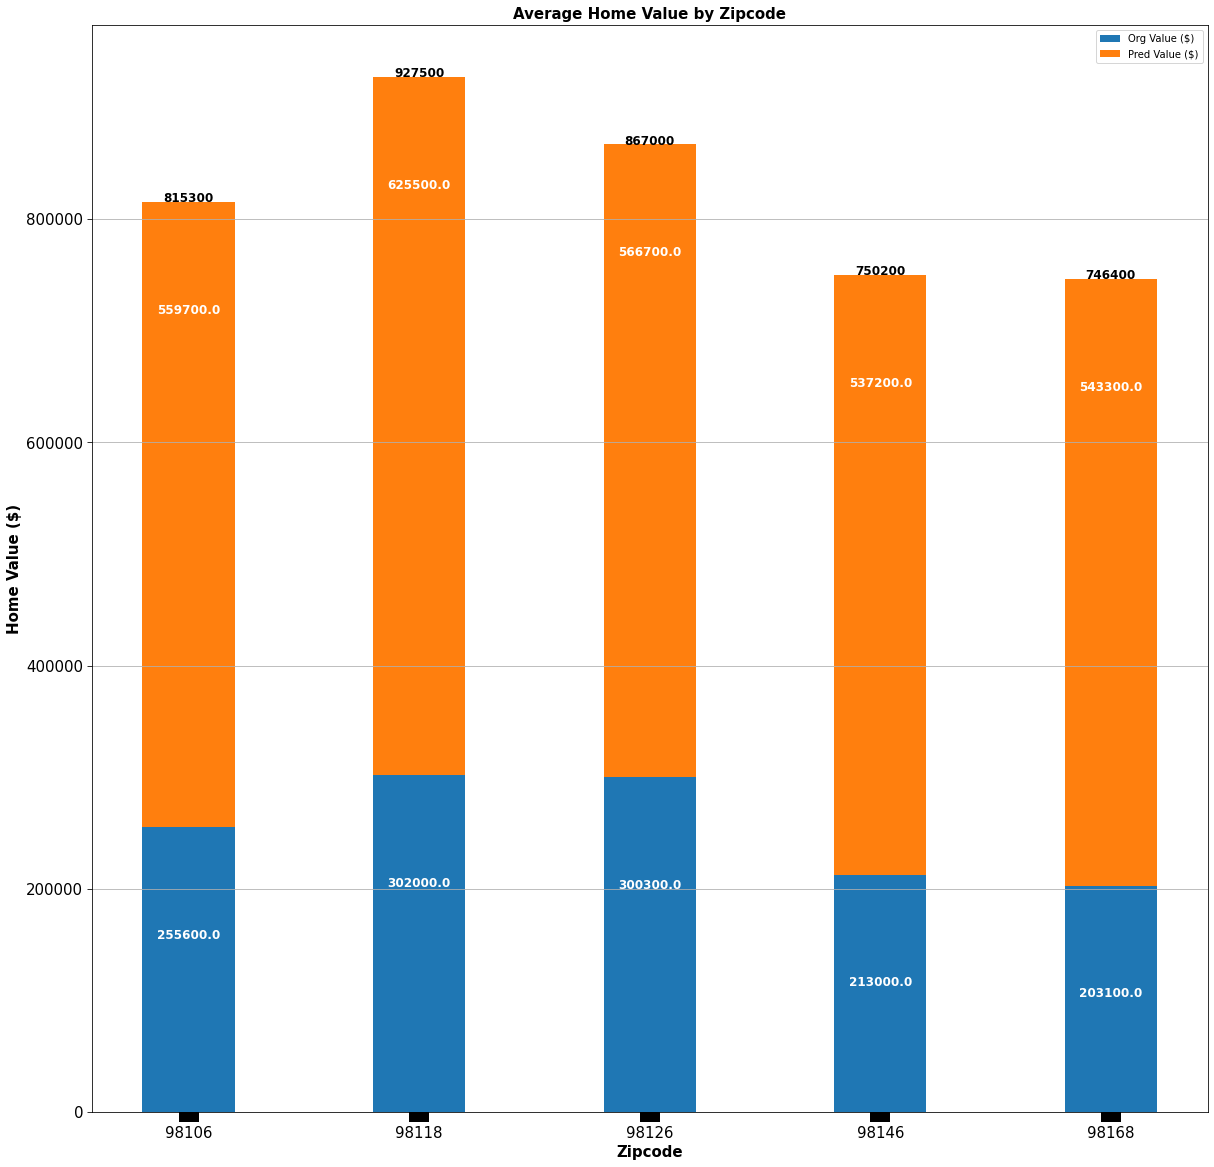

In [114]:
#Graphing the stackedbars for Average Homevalue

#Import ploting library
from matplotlib import pyplot as plt

#Setting the plot frame, axis and size
fig, ax = plt.subplots(figsize = (20,20), facecolor = "white")

#Setting width of bars
width = .4
#Setting zipcodes as columns and strings.  Easier to have as strings than numbers because they are not continous
col = ["98106", "98118", "98126", "98146", "98168"]

#Creating two bar charts for bottom (pred value) and top stacks (original value)
p1 = ax.bar(col, agg_zips['org_value'],width = width,label='Org Value ($)')
p2 = ax.bar(col, agg_zips['pred_value'],width=width,  bottom=agg_zips['org_value'],
       label='Pred Value ($)')

#Setting labels on axis and titles
ax.tick_params(axis = "y",labelsize = 15, length=5)
ax.tick_params(axis = "x",labelsize = 15,  length=10, width = 20)
ax.set_ylabel("Home Value ($)", fontsize=15, fontweight = "bold")
ax.set_xlabel("Zipcode", fontsize=15, fontweight = "bold")
ax.set_title('Average Home Value by Zipcode', fontsize=15, fontweight = "bold")
ax.set_xticks(col)

#Adding gridlines on minor y axis
ax.grid("minor", axis ="y" )


#Calculating the total of old and pred value sum
#Seeting the offest where the label should be
y_offset = -4

#Calculation of total
zip_sums = agg_zips[["org_value", "pred_value"]].sum(axis = 1)
for i, zip_sum in enumerate(zip_sums):
    ax.text(col[i], zip_sum+ y_offset, round(zip_sum), ha='center',
          weight='bold',size=12)
    
#Putting value labels for each stack
y_offset = -100000
#For loop for evaluating each bar and placing the label there
#Patches are used to specify the bars
for bar in ax.patches:
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='white',
      weight='bold',
      size=12
  )    

#Showing legend
ax.legend(prop={'size':10})


#Save image in folder
plt.savefig("images/ZipcodeAvg_HomeValue.png", dpi=99)



## Zipcode 98118 Graphing Example

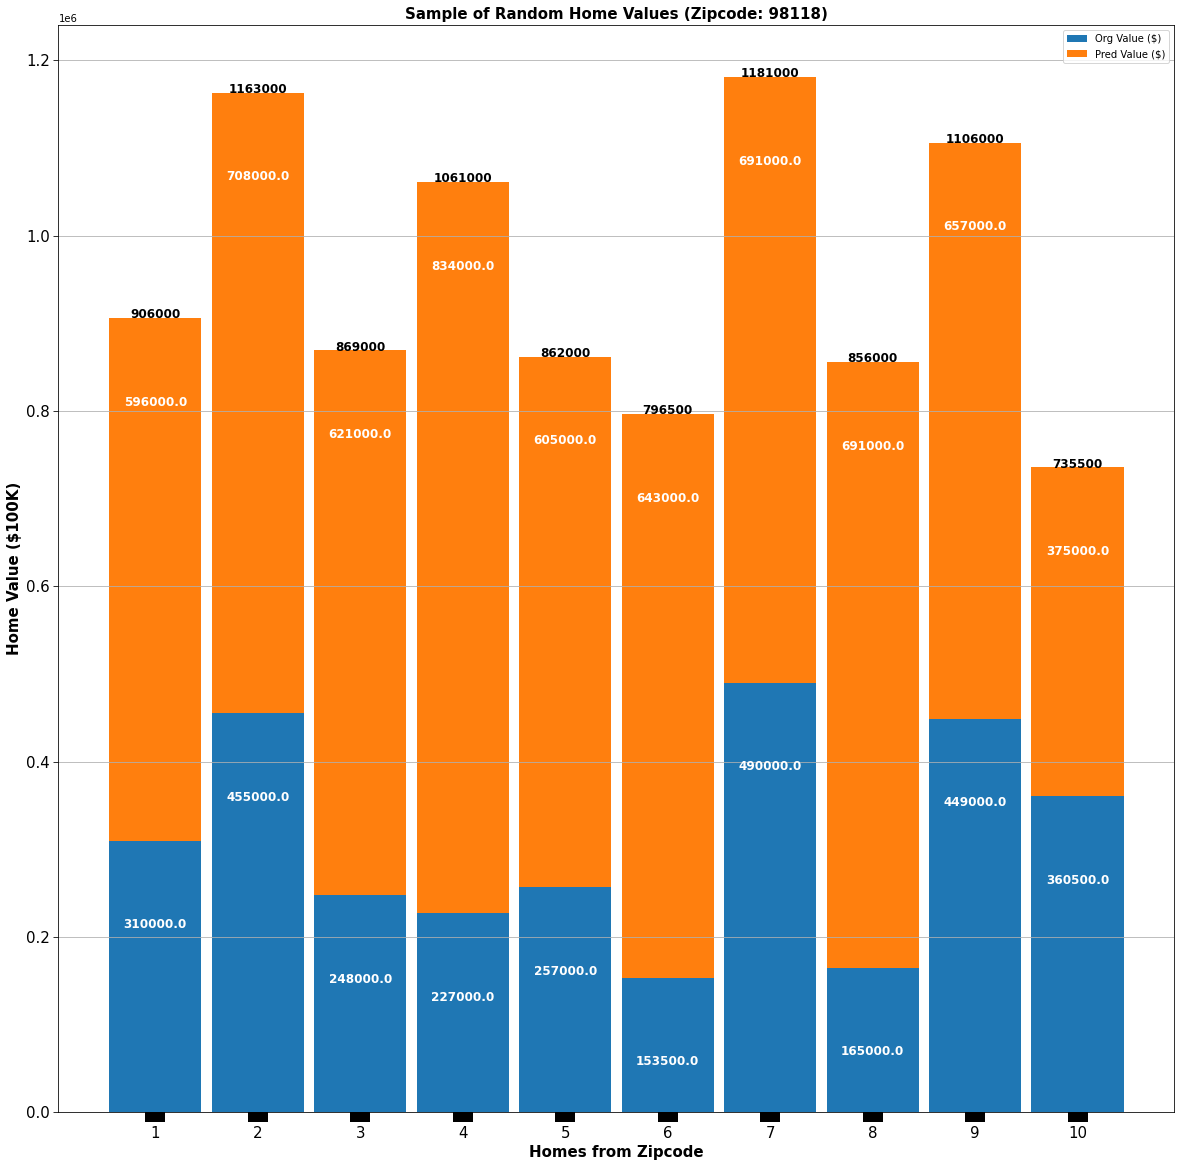

In [115]:
#Graphing the stackedbars for a specific zipcode

#Import ploting library
from matplotlib import pyplot as plt

#Setting the plot frame, axis and size
fig, ax = plt.subplots(figsize = (20,20), facecolor = "white")

#Setting width of bars
width = .9

#Calling above function for zipcode 98118
gzip = filt_zcode(98118)

#Only using the top 10 (out of ~106) values
zip18 = gzip.head(10)

#Setting an arbitrary x-axis label
col = [1,2,3,4,5,6,7,8,9,10]

#Creating two bar charts for bottom (pred value) and top stacks (original value)
p1 = ax.bar(col, zip18['org_value'],width = width,label='Org Value ($)')
p2 = ax.bar(col, zip18['pred_value'],width=width,  bottom=zip18['org_value'],
       label='Pred Value ($)')

#Setting labels on axis and titles
ax.tick_params(axis = "y",labelsize = 15, length=5)
ax.tick_params(axis = "x",labelsize = 15,  length=10, width = 20)
ax.set_ylabel("Home Value ($100K)", fontsize=15, fontweight = "bold")
ax.set_xlabel("Homes from Zipcode", fontsize=15, fontweight = "bold")
ax.set_title('Sample of Random Home Values (Zipcode: 98118)',fontsize=15, fontweight = "bold")
ax.set_xticks(col)

#Calculating the total of old and pred value sum
#Seeting the offest where the label should be
ax.grid("minor", axis ="y" )

#Total of old and pred values
y_offset = -4
zip_sums = zip18[["org_value", "pred_value"]].sum(axis = 1)
for i, zip_sum in enumerate(zip_sums):
    ax.text(col[i], zip_sum+ y_offset, round(zip_sum), ha='center',
          weight='bold',size=12)
    
#Putting value labels for each stack
#Seeting an offset of where to put the labels
y_offset = -100000
#For loop for evaluating each bar and placing the label there
#Patches are used to specify the bars
for bar in ax.patches:
    ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='white',
      weight='bold',
      size=12
  )   

ax.legend(prop={'size':10})
#Save image in folder
plt.savefig("images/Zipcode18_HomeValue.png", dpi=99)


---

# Regression Results

### Model Results
    
The goal was to create a multilinear regression model that would be able to predict housing prices upon improvements. The model created to do this used an initial subset of data (from King County database) to process, train and test for this problem.

The final model was the fourth iteration. The intial model started as a base model linear regression model and increased in complexity with transformations (Log and One Hot Encoding) and filtering of features.

The final accuracy metrics are good enough to use the model for basic home value predictions.

**Coefficient Results:**<br>
Grade Feature: For every one-unit increase in the Grade, the home value increases by about 26%.<br>
Condition Feature: For every one-unit increase in the Condition, the home value increases by about 3%.<br>
Sqft_living Feature: For every 5% increase in the sqft, the home value by about 20 %.<br>
    
**RMSE Score Results:**<br>

The refinement of our model decreased the train and test RMSE scores by over 260K to ~.197K. Applying the Log Transformer on our train and test target parameter "price" was the primary catalyst for this decrease.  The price value was initial skewed and needed to be normalized.

The final model has a ~129k RMSE. This means the predicted home price can be off by about $197,000K.

**R2 Score Results:**<br>

The final model increased its R2 score by ~.15. The best base model score was .5 and the final test's model score ended with ~.66. As we refined the model, it increased its ability to account and explain for the variation.  This was due primarily to the use of multiple features and the filtering of insignificant ones.


**Linear Regression Model Assumptions:**

The final model passed the linearity, normalization and homoescedasticity assumptions and failed the multicollinearity assumption.

For this particular problem we are using the model for predictions and inferencial uses. Therefore, the failure of multicollinearity was not a major roadblock this time. For inferencial use, a deeper evaluation on the most optimistic combinations of features to use for the model must be done.

**Validation:**

Our model development had a training, validation and test set.  The test set that was intially split from the test set was segregated the entire model development.
Using Kfold cross validation was a more robust validation method over the basic train/test split.  

### Model RMSE and R2 Scores:

**Final Unlogged Train Mean Squared Error:** 206364.0 <br>
**Final Unlogged Test Mean Squared Error:**  196739.0 <br>

**Final Train Model Score:**  0.6438531698069864<br>
**Final Test Model Score:**  0.6565129767577557<br>

**Third Train RMSE (Logged):**  0.3147718460539656<br>
**Third Test RMSE(Logged):**  0.3075890371545622<br>

**Third Train Model Mean Score:**  0.644673314060476<br>
**Third Validation Model Mean Score:**  0.6414594822403191<br>

**Second Model Kfold Train Mean score:**      0.6446907194384797<br>
**Second Model Validation Mean score:** 0.6414405396108452<br>

**Baseline Models:**

**Train RMSE:**  260172.0361161922<br>
**Test RMSE:**  268864.35998011974<br>

**Kfold Train Mean Score:**      0.4884772214299433<br>
**Kfold Validation Mean Score:** 0.5000072841051805<br>

**Train/Test Split Train Model Score:**  0.49091149233831743<br>
**Train/Test Split Validation Model Score:**  0.494749423259338<br>



### Prediction Results

Using the the trained multi-linear regression model, home prices were able to be predicted for a subset of homes. Because this problem was to predict home values after improvements, homes were chosen that had a major space for improvement.

The intial dataset used was filtered by the top five zipcodes that have the most homes with a "**condition" of 3-Average or less & a "grade" of 6-Low Average or less**". 

The chosen homes were then modified to have a condition of **4-Good** and a grade of **8-Good** while all the other features stayed the same. The modified condition and grades were chosen as an objective goal. The thought was to give home owner incentives to improve upon their property, even if they do not reach the desired criteria.

These predictions will serve as samples for the real estate agents to understand the benefit of real estate data analysis. Because home value can depend on the surrounding community, grouping the homes for predictions by zipcodes helps the agent target a specific community for an extra benefit.



### Home Improvement Prediction Results


Across the five chosen zipcodes, they all resulted in several hundred thousand dollar increase and minimum 100% increase in value.

Average home value differences :

- Zipcode 98118: \$ 323,500, 100% Increase<br>
- Zipcode 98106: \$ 304,100, 100% Increase<br>
- Zipcode 98126: \$ 266,500, 100% Increase<br>
- Zipcode 98146: \$ 324,300, 200% Increase<br>
- Zipcode 98168: \$ 340,300, 200% Increase<br>


Specific zipcode example (98188) had the highest amount of homes (106) that met our criteria for needing improvement.<br>

Zipcode 98188 home value differences:

- Average of  \$ 323,500 price increase <br>
- Lowest change of \$ 14,500 increase (35,000 loss was recorded, but most likely an outlier error). <br> 
- Highest change \$624,000 increase. <br>


----

# Conclusion

## Limitations

### Stakeholders Audience

There were several major limitations. A lot of it stemmed from understanding the domain and making processing and analysis decisions from that knowledge.

- **Limited dataset:**
    - The full dataset was filtered and scoped due to limited resources.  There were attributes (features) in the dataset that would have supported a more accurate and model.
    - Dataset does not take into account aesthietics. There are no features or pictures evaluating this aspect.
- **Unknown realistic "Condition" and "Grade" values:**
    - Lack of knowledge on knowing whata realistic increase in "condition" and "grade" would be from the baseline. All chosen instances in the dataset were increased to the same values. It may be unrealistic to have a home in poor condition and below minimum building stards actually increase to "good" in both.
- **Unknown affects on other variables:**
    - The "condition" and "grade" feeatures wree the only ones modified from the intial dataset. Home improvements would definitely affect those features. However, home improvements done on a home might also affect features like sqft_living, floors, bathrooms or bedrooms in some way. 
- **Communal effects:**
    - The predictions were based on the modication of specific features for an individual home. The predicitons did not take into account how the home improvements would affect the surrounding comparible homes. This is common task done in real estate.   
- **Model approach fit for specific problem:**
    -  The model developed was for a specific problem. Understanding how home improvement how affect home values and the amount of the difference. Other usecases and problems were not taken into account. There may be insights to game from the model and predictions that  
- **Time/Resources:**
    - Because of limited time and skillset a "good enough" model was delivered. The datasets, techniquesm model robustness had to be scoped.
- **Actual market culture:**
    - The dataset used wasn't the most current. These last two years have had major shifts in the supply and demand of homes. Therefore a shift in the home value estimates shift as well.
- **External effects:**
    - The model and predictions did not account for external effects that were not attributes of the home and its property.
- **Data scientist skillset:**
    - As a new data scientist the the model robustness is limited due to experience and skills.
   
### Data Science Audience

- **Dataset limitations:**
    - A subset of the dataset was used. Using the whole dataset would have been would have given more choices to choose from in terms of correlation
    - The feature "waterfront" only had values of "Unknown", "No" and "Yes". It does not say what the waterfront view is, if the feature had a value of "Yes"
- **Linear Regression Assumptions:** 
    - The multicollinearly assumption was the only assumption that clearly failed.  Because of the resource and dataset scope limitations this aspect was not changed to fix this issue. If we wanted inferential analysis this would have to be fixed.
- **Limited in robustness:**
    - Not having the domian knowledge, a model that allowed for more flexibility in feature combinations and value valuations would have been beneficial. 
- **Iterations:**
    - There were only 4 iterations done to create a prediction model.  There were a lot of changes and approaches that would have required quite a lot more iterations to refine the model from the previous feedback received.
- **Feature combinations:**
    - The feature combinations were chosen from filtering the intial set down. Using the statsmodel p-value and the VIF. There wasn't a robust method that optimizes the best combinations for the model.
- **Model error and scores:**
    - It is not fully understood if the  errors of a RMSE .3 R2 .66 are acceptable for the specific problem and solution approach. Also with these errors and score, it is still not understood what the cause of the of there errors is.


## Recommendations: 

- **Low Hanging Fruit: Focus on major areas with high needs to bring up home values.**
    - **At a minimum promote increasing conditions (e.g. maintenence) in the homes.**
        - For every one-unit increase in the Condition, the home value increases by about 3%
    - **Promote bring homes up to code (this increases the grade, which impacts home values the most).**
        - For every one-unit increase in the Grade, the home value increases by about 26%.
    - **While improving the home recommend adding a room (e.g. bathroom, small bedroom).**
        - For every 5% increase in the sqft, the home value by about 20 %.
        - For every 1% increase in the sqft, the home value by about 4 %. 
 ---
 
 ### Next Steps:<br>
 
- Choose and present  incintives and vision of home improvement within a community. This incintivizes people and helps with accountability. 
    - Choose a few zipcodes to try out and then offer feedback that would improve model accuracy or approach.
    - The communal effect will possibly increase prices even though the highest improvements may not have happened.
    - Present businessess(e.i. construction, remodeling) of the potential work to be done. Partnering with them and possibly offering discounts to the select communities would be a good incintive for communities to improve together
- Market to potential homebuyers (individuals and investors) of the potential return on investment. These homebuyers may potentially buy the homes before the improvements and then fix them up.
- Increase consultation with the data scientiest/analys to improve our domain knowledge. As both parties educate each other the model solution has a better chance at being more accurate and robust.
    - Feedback on realistic feature values after home improvement
    - Having examples and case studies of home improvements specifics would help give a realistic picture to all of the stakheholder supporting the predictions and work.






